In [140]:
import numpy as np
import pandas as pd
import time
import sklearn

%matplotlib notebook
%matplotlib inline

readdata = pd.read_csv("C:/Users/Dom/MPhys/TheGrandTour/wine_data.txt", sep="\t", header=None);
data = np.array(readdata);
data = np.delete(data, 0, 0)
data = data.astype(float)
data = np.swapaxes(data,0,1)

# Need to seperate the classification dimension:
classification = data[13]
data = np.delete(data, 13, axis=0)


# make list of colours for each number:
data_colour = []
for i in range(len(classification)):
    if classification[i] == 1:
        data_colour.append("r")
    elif classification[i] == 2:
        data_colour.append("b")
    elif classification[i] == 3:
        data_colour.append("g")
        


#VARIABLES
stepSize = 0.01
nSteps = 1000

def getAlpha(d):
    """
    NEEDS IMPLEMENTATION
    Should produce 1xd(d-1)/2 array of position in grand tour.
    """
    p = d*(d-1)/2     
    primeList = []
    count = 1
    while len(primeList) < p:
        count += 1
        primeBool = False
        for i in range(2, count - 1):
            if count % i == 0:
                primeBool = True
        if primeBool == False:
            irrational = (np.sqrt(count)%1)
            primeList.append(irrational)
            
    primeList = np.asarray(primeList)
    primeList = primeList.dot(stepSize)
    """
    Irrational number generation using exponentials, not being used
    p = int(d*(d-1)/2)
    alpha = np.zeros(p) #alpha(t) parameters defining grand tour in G2,d
    for i in range(0,p):
        alpha[i] = (np.exp(i) % 1) * 2 * np.pi
        
    alpha = alpha.dot(0.001)
    """
    
    return primeList


def getAngles(alpha,d):
    """""
    Inputs: 
    alpha = 1xd(d-1)/2 array defining position on grand tour
    d = dimensions of data
    Outputs a dxd array of angles required for the transformation
    """
    theta = np.zeros((d,d));
    i = 0;
    k = 0;
    
    while i < d-1:
        j = i + 1;
        
        while j < d:
            theta[i][j] = alpha[k];
            j += 1;
            k += 1;
    
        i+= 1;
        
    return theta;


def RotationMatrix(i, j, d, theta):
    """
    Inputs:
    i = first indicie of rotating plane
    j = second indicie of rotating plane
    d = dimensions of data
    theta = dxd array of angle of rotation of rotating plane
    Outputs a rotating matrix to rotate plane of ixj plane by theta_ij
    """
    R = np.identity(d)
    R[i,i] = np.cos(theta)
    R[i,j] = -1*np.sin(theta)
    R[j,i] = np.sin(theta)
    R[j,j] = np.cos(theta)
    return R


def BetaFn(d, theta):
    """
    Inputs:
    d = dimensions of data
    theta = dxd array of angle of rotation ixj plane
    Outputs the full matrix transformation for all rotations
    """
    b = RotationMatrix(1, 2, d, theta[1,2])
    i = 1
    j = 2
    for i in range(d):
        for j in range(d):
            if j <= i:
                continue
            if i==1 and j==2:
                continue
            b = np.matmul(b, RotationMatrix(i, j, d, theta[i,j]))
            
    return b


def GrandTour(data, nSteps):
    """
    Inputs:
    data = array of data points, dimensions x npoints
    Outputs a 3D array number of points x t x dimensions, where t
    the time step at that point in the tour
    """

    d = np.shape(data)[0] #dimensions of data
    nPoints = np.shape(data)[1] #number of data points
    tData = np.zeros((nSteps,d,nPoints)) #initialise 3d matrix to store stransforemd data at each timestep
    tBeta = np.zeros((nSteps,d,d))
    Alpha = getAlpha(d)

    
    for t in range(0, nSteps):
        
        
        alpha = Alpha.dot(t)
        theta = getAngles(alpha, d)
        b = BetaFn(d, theta)
        a = np.matmul(b, data)
        tData[t,:,:] = a
        tBeta[t,:,:] = b
        
    return tData


tData = GrandTour(data, nSteps)



In [55]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

%matplotlib inline

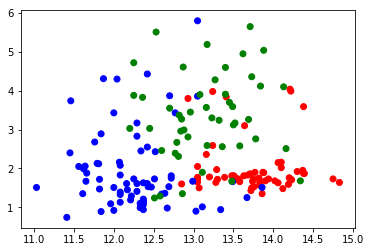

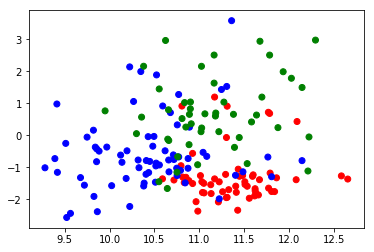

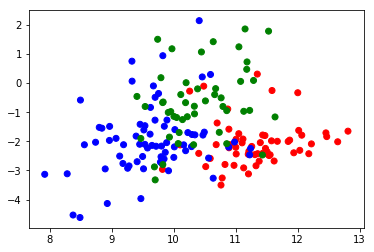

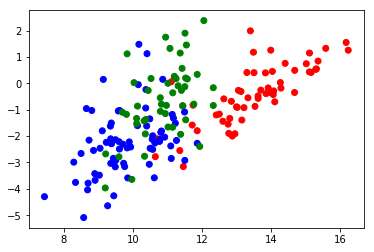

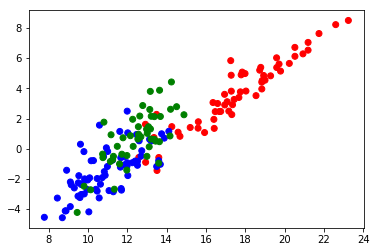

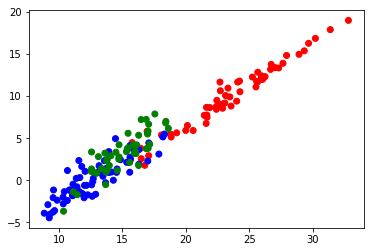

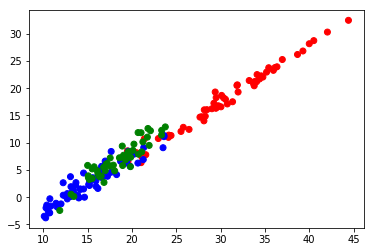

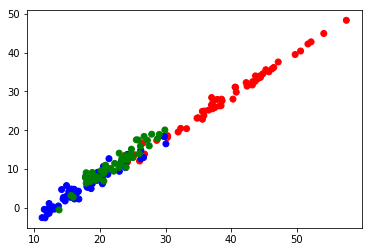

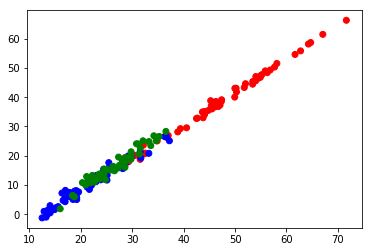

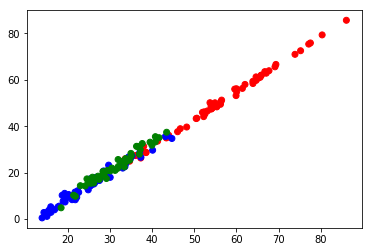

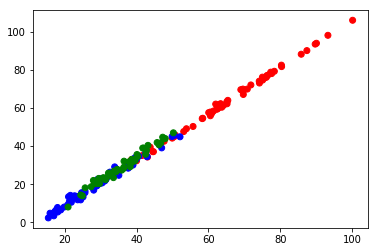

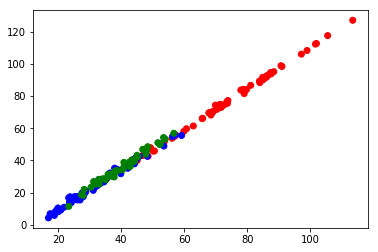

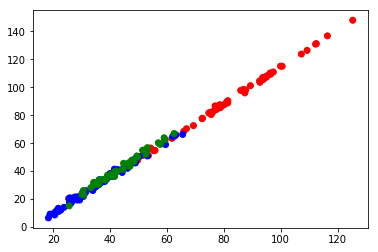

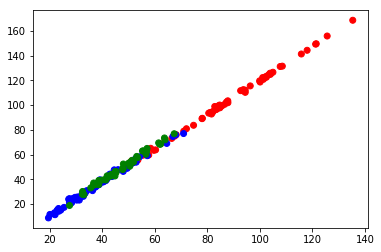

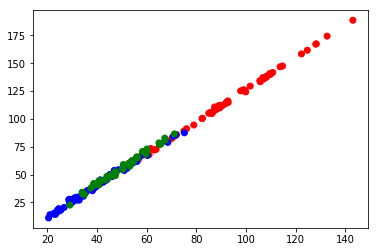

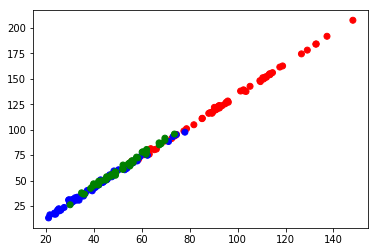

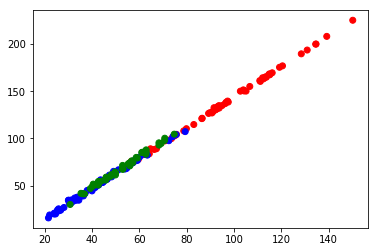

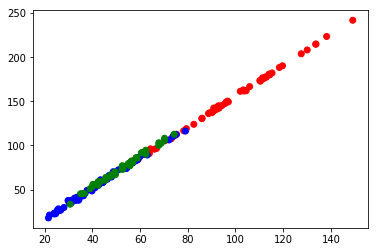

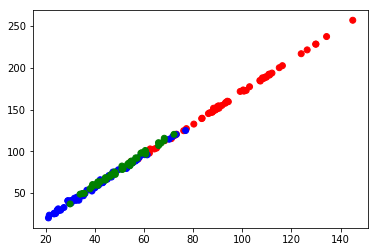

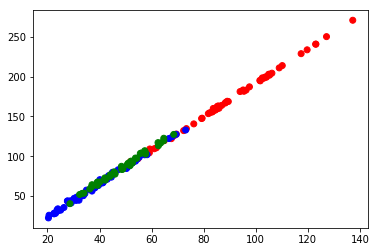

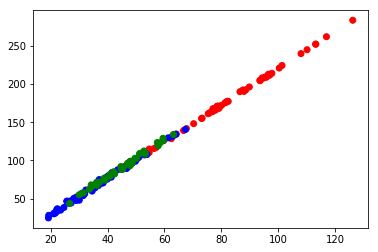

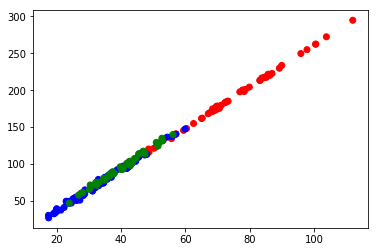

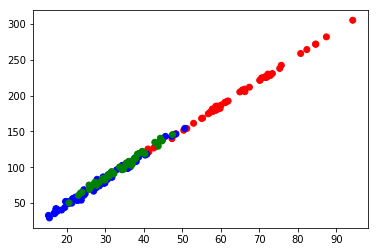

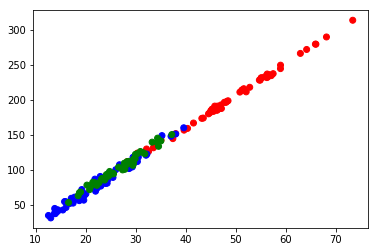

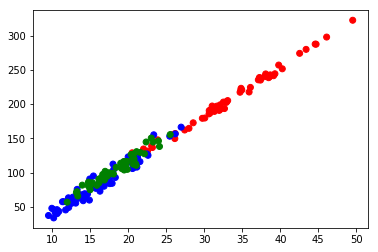

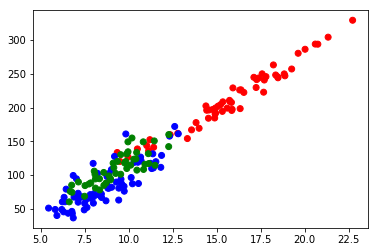

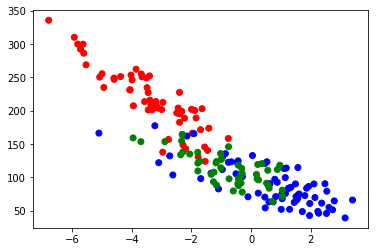

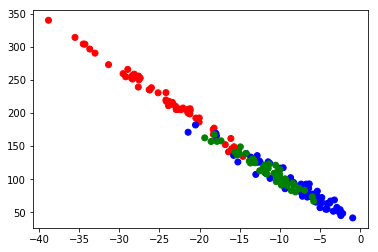

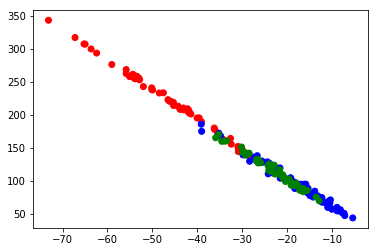

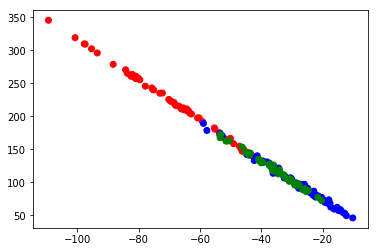

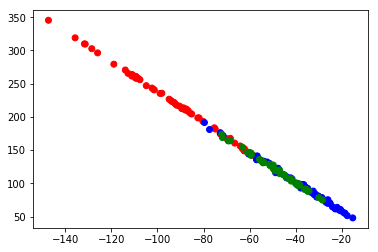

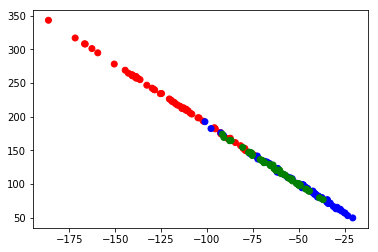

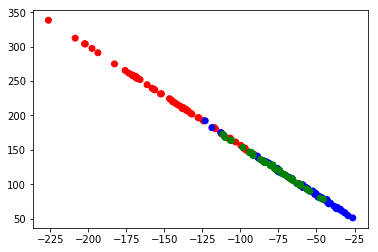

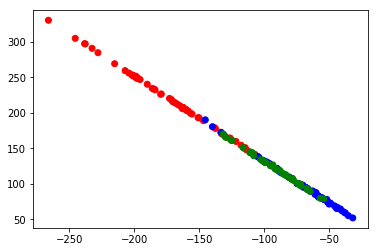

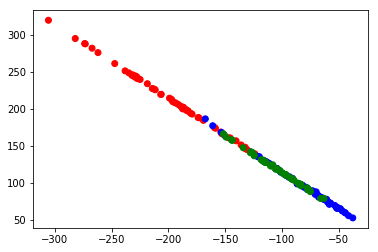

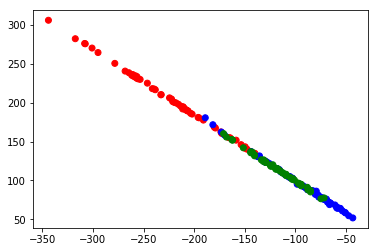

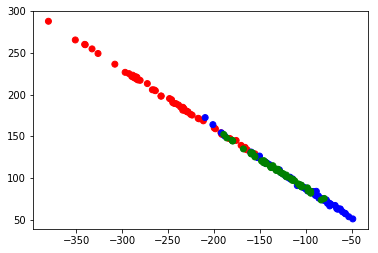

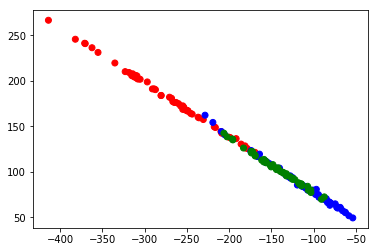

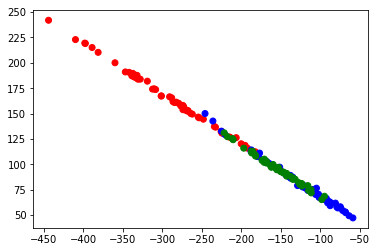

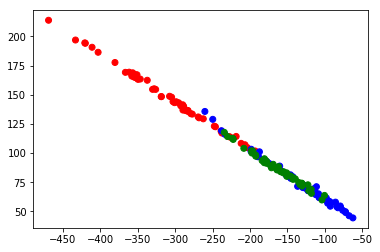

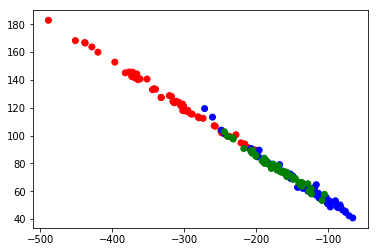

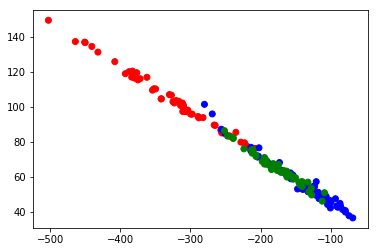

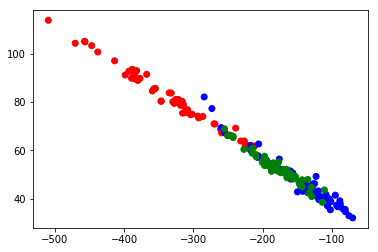

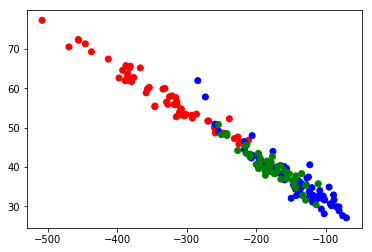

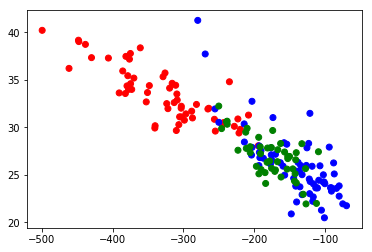

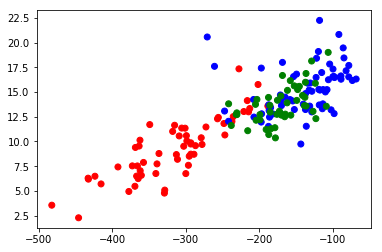

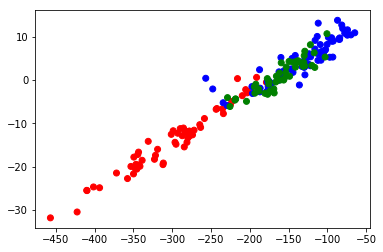

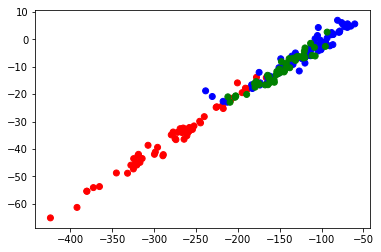

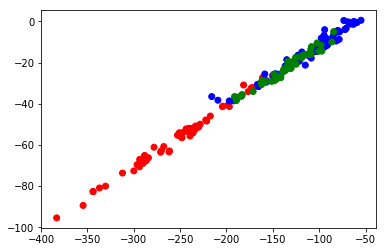

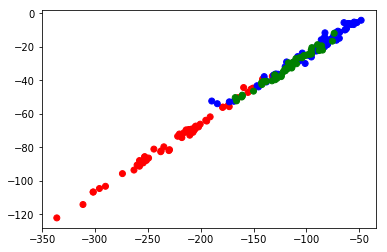

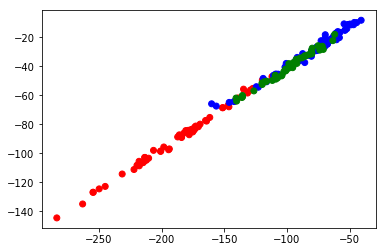

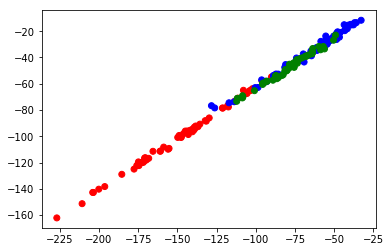

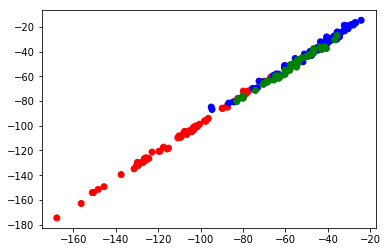

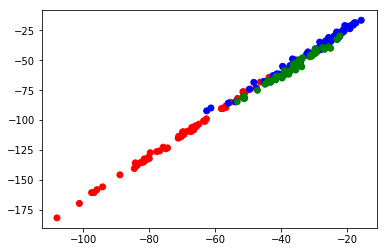

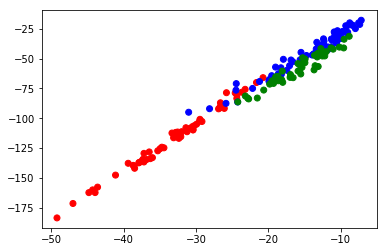

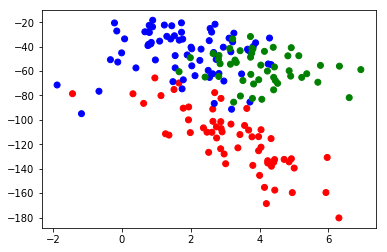

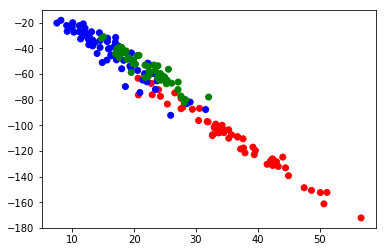

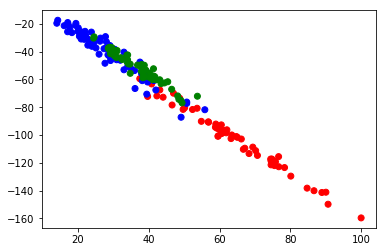

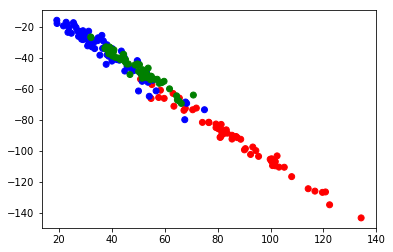

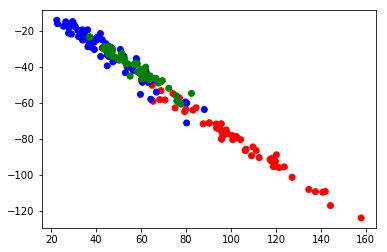

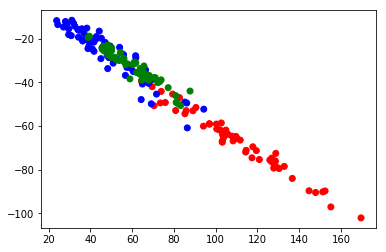

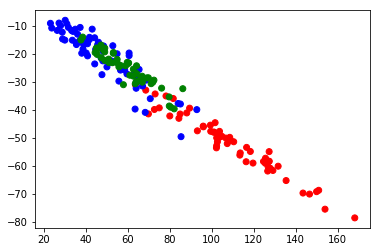

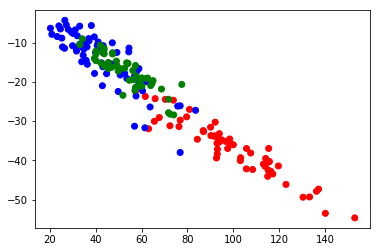

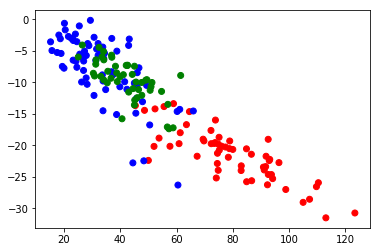

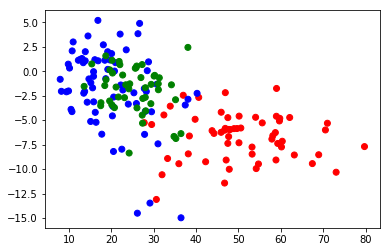

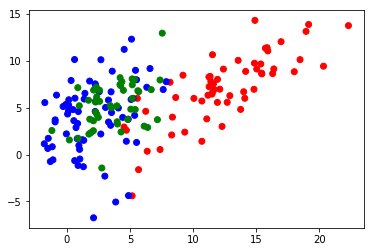

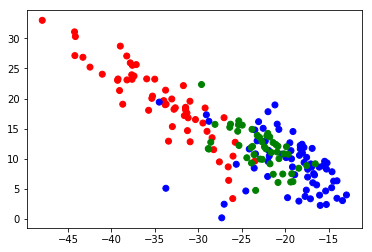

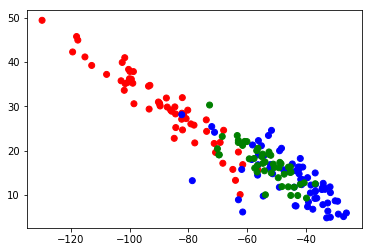

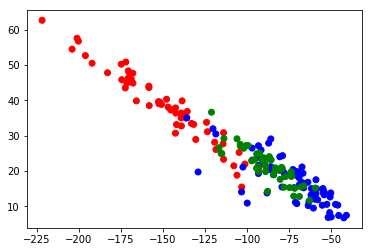

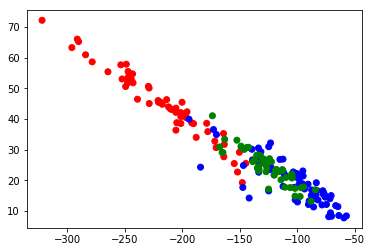

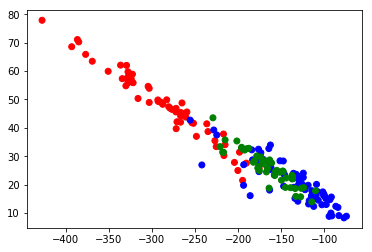

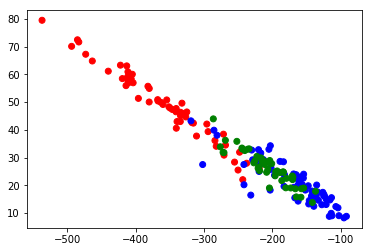

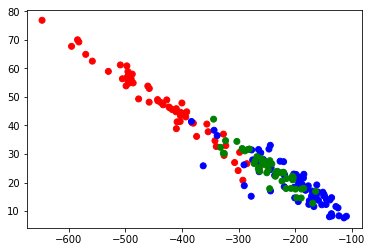

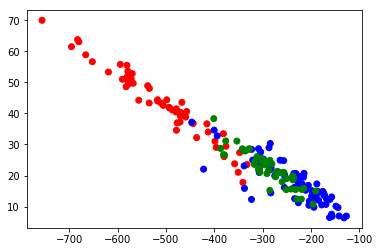

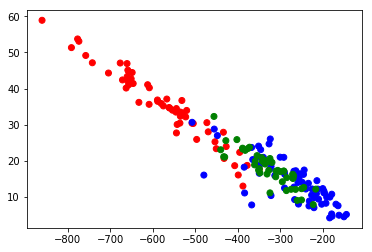

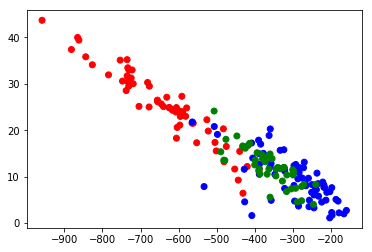

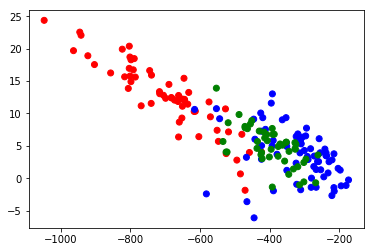

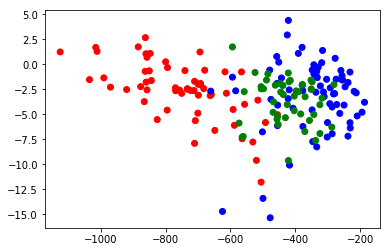

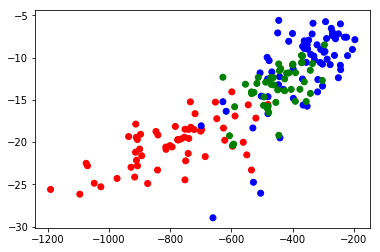

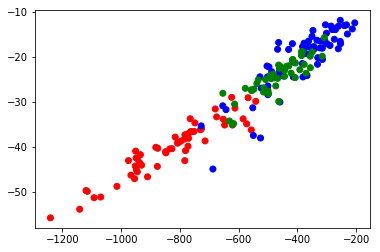

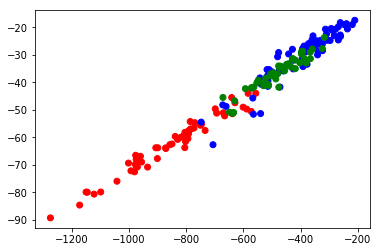

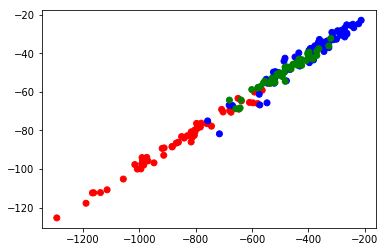

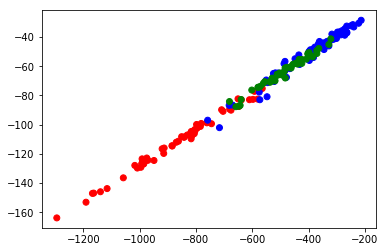

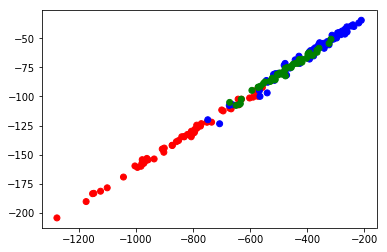

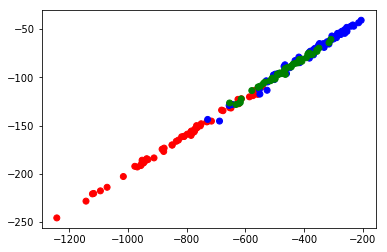

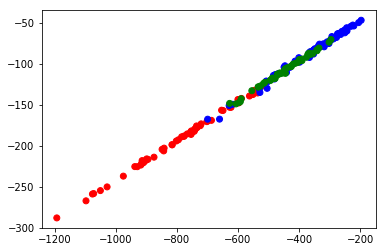

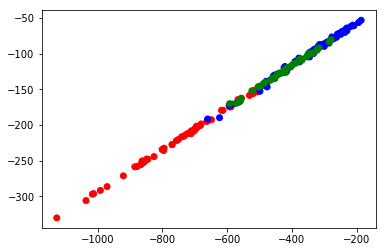

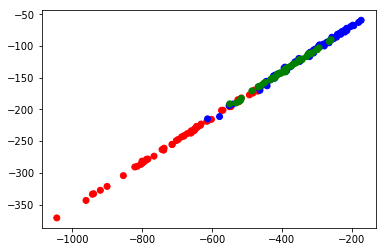

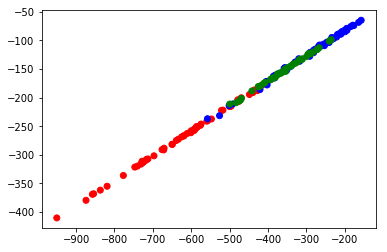

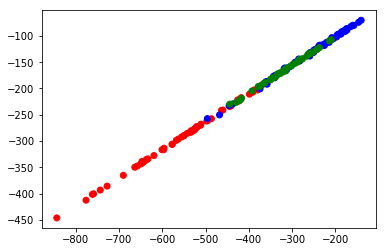

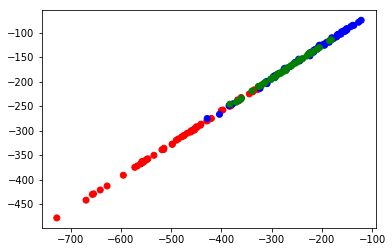

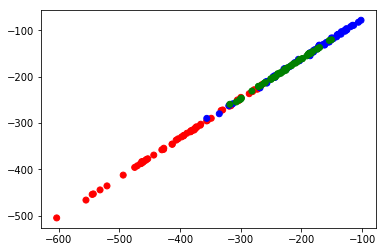

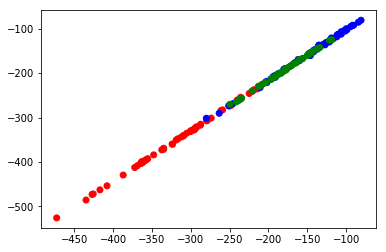

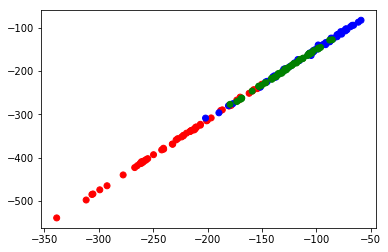

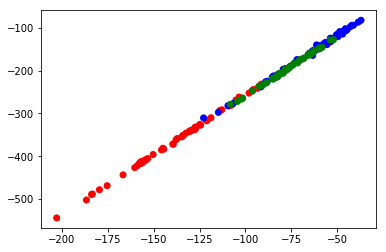

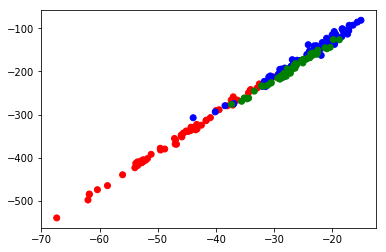

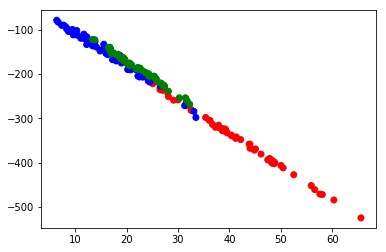

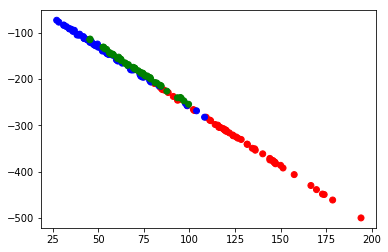

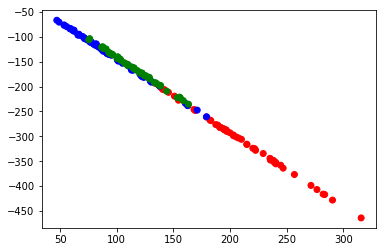

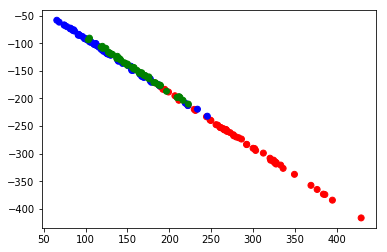

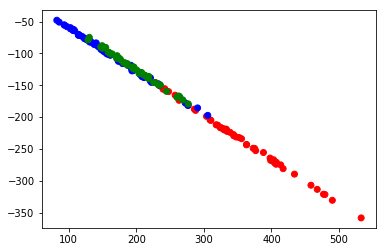

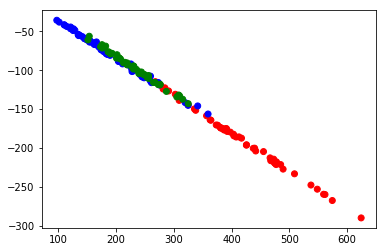

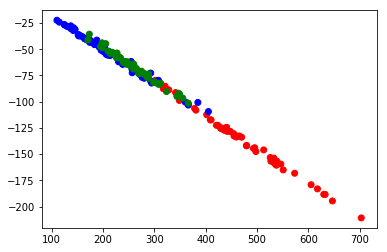

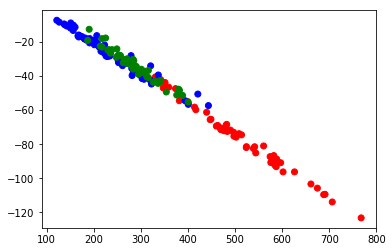

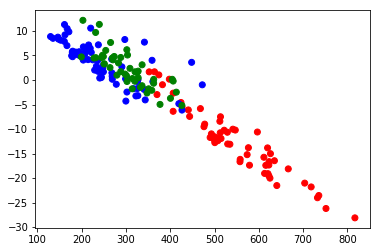

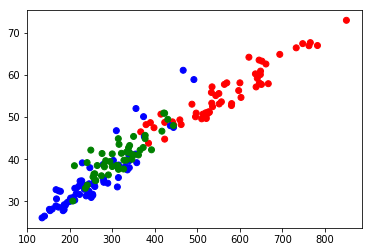

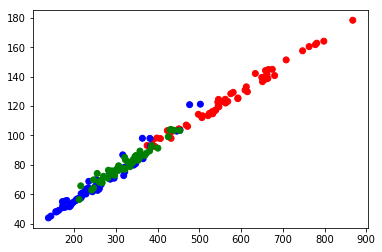

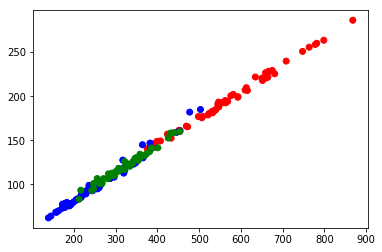

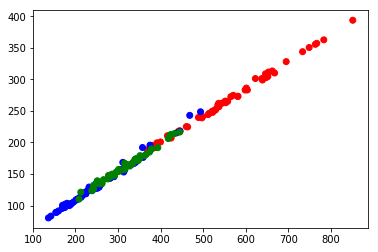

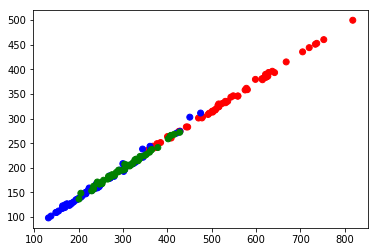

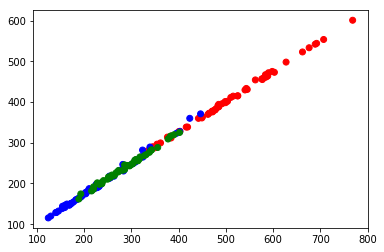

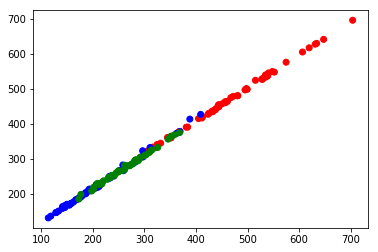

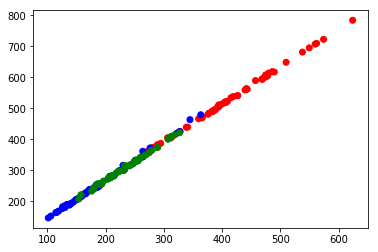

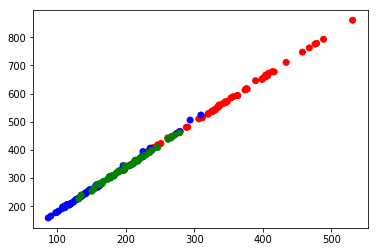

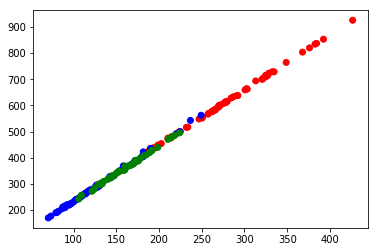

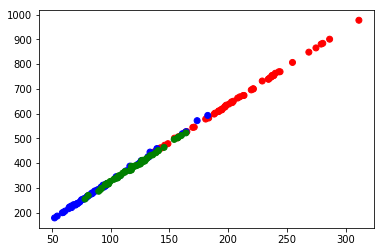

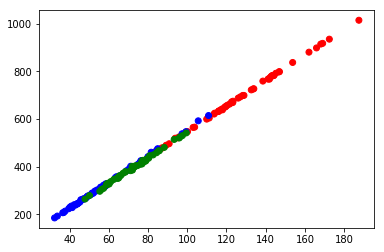

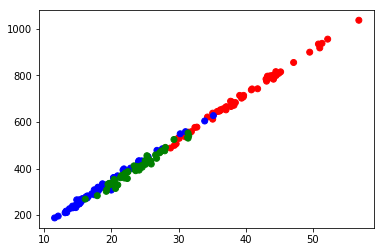

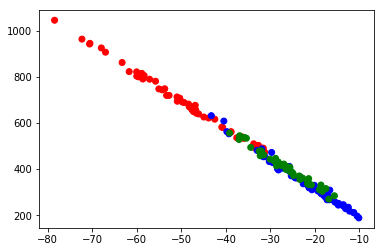

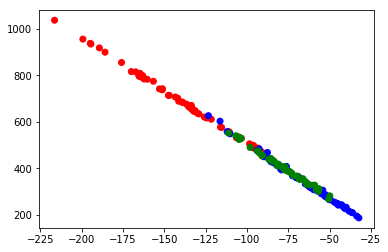

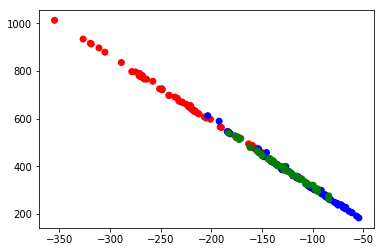

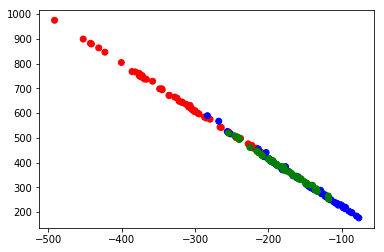

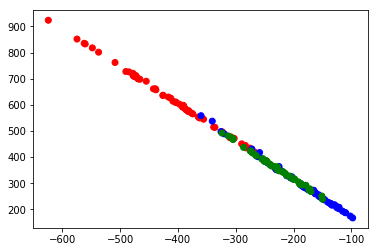

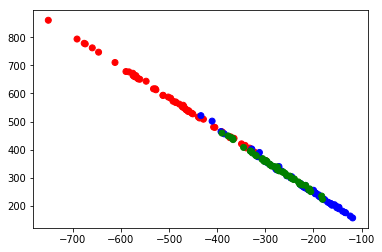

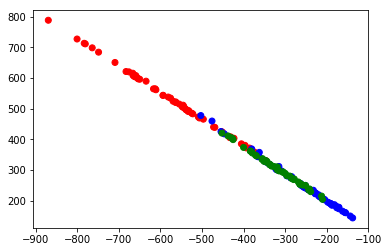

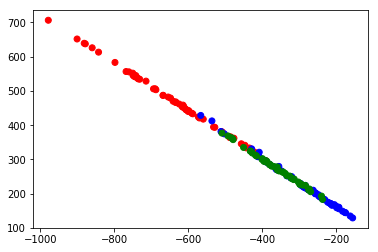

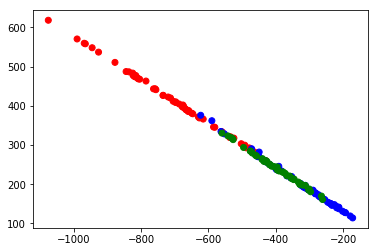

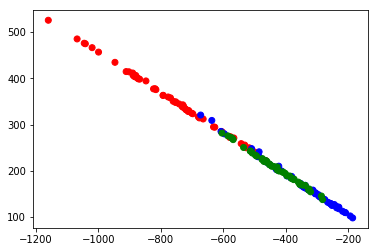

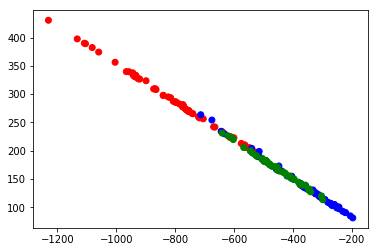

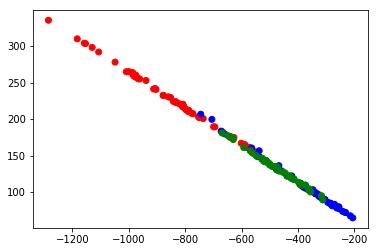

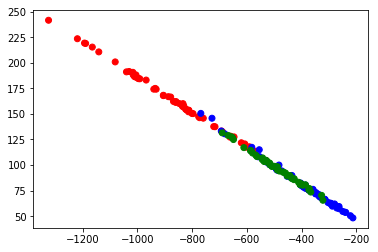

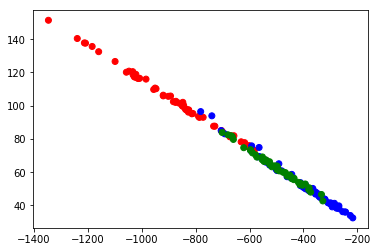

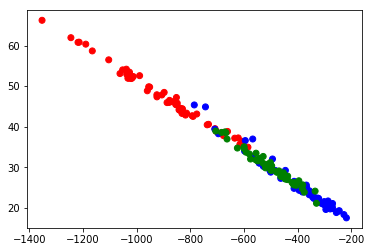

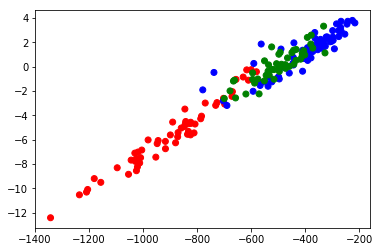

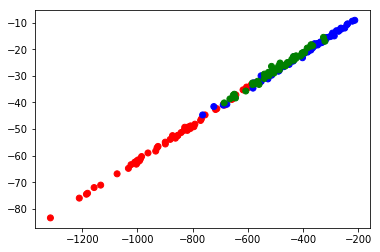

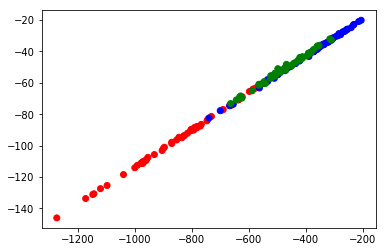

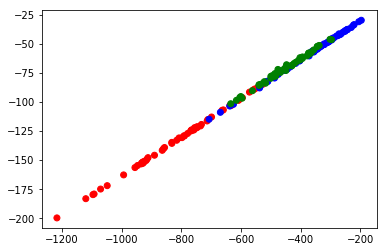

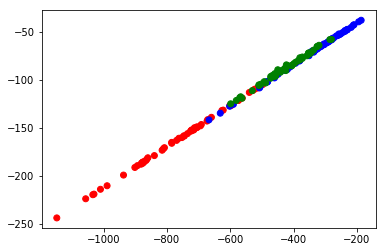

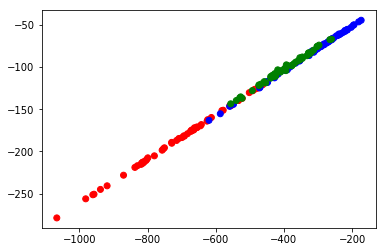

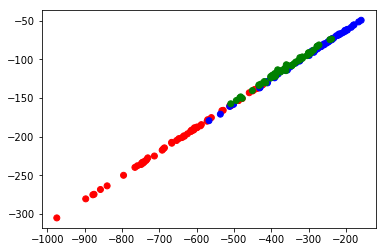

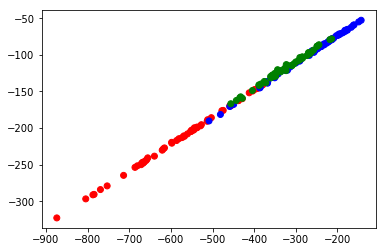

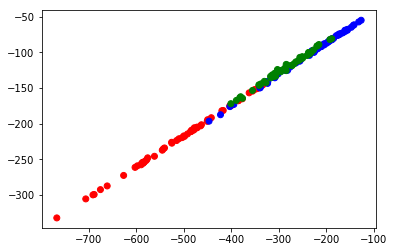

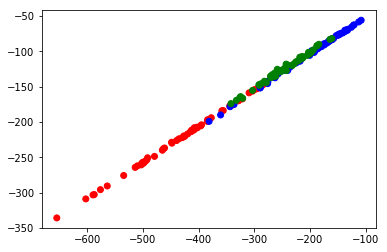

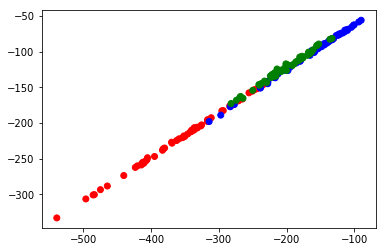

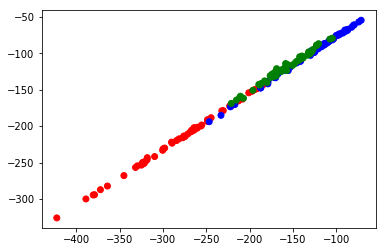

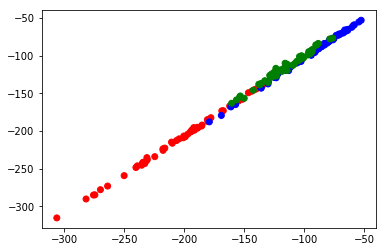

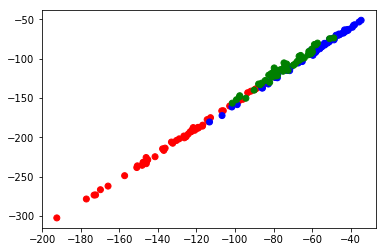

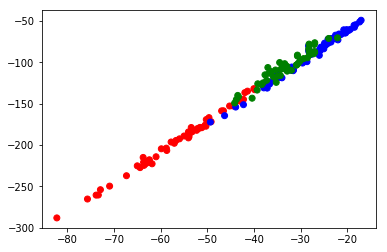

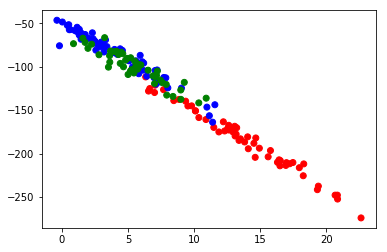

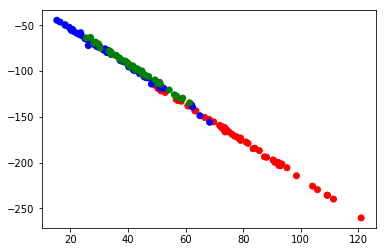

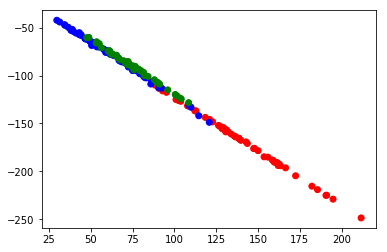

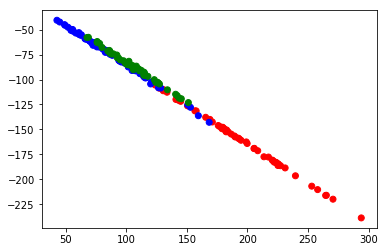

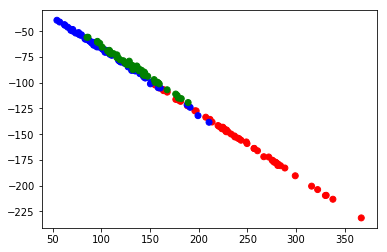

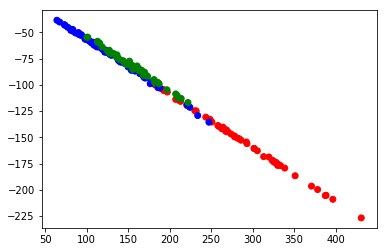

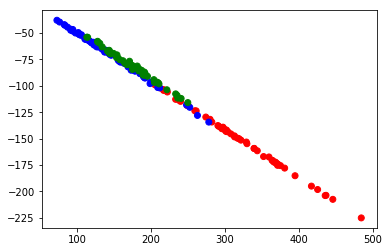

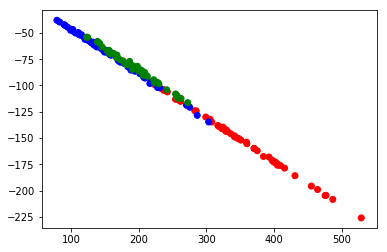

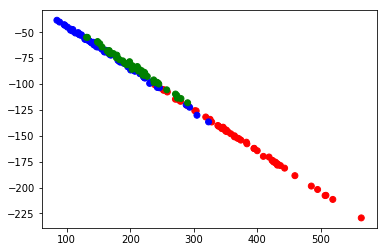

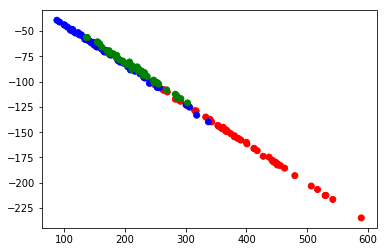

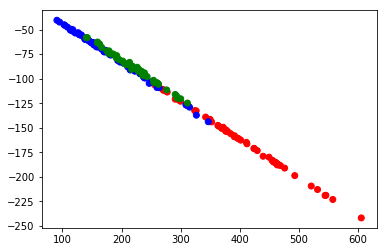

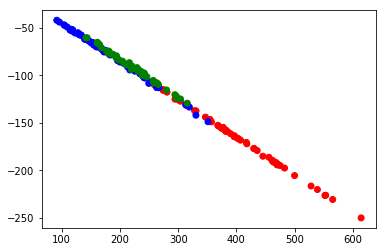

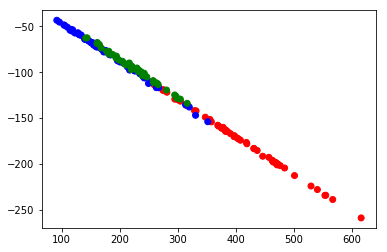

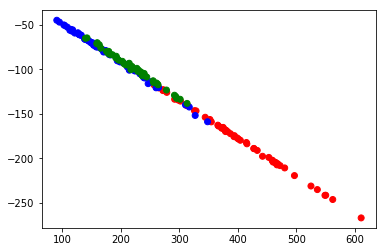

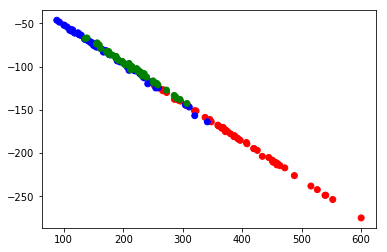

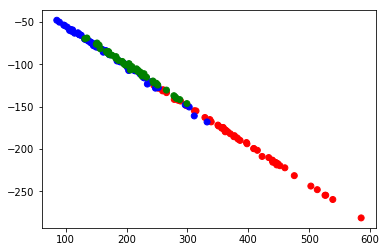

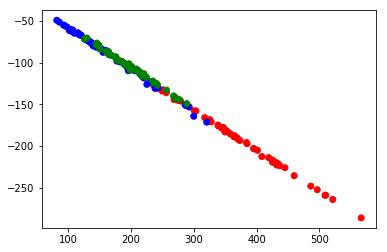

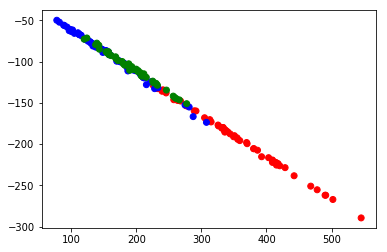

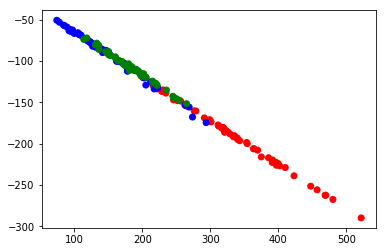

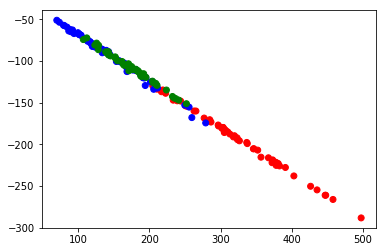

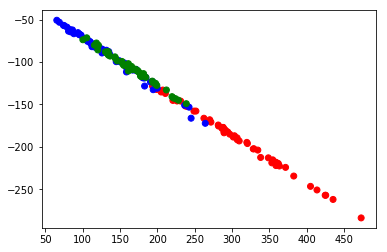

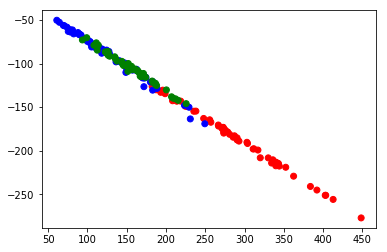

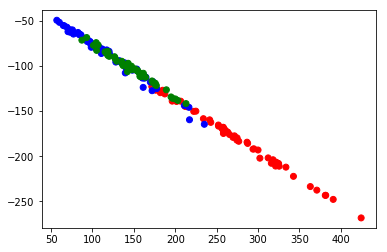

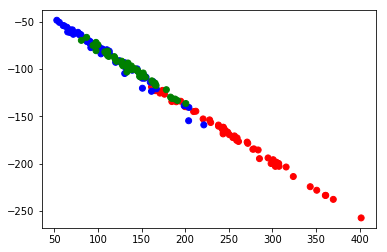

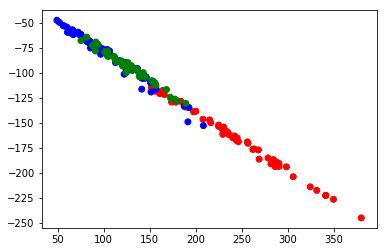

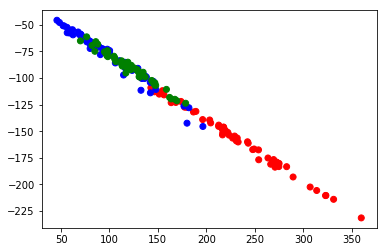

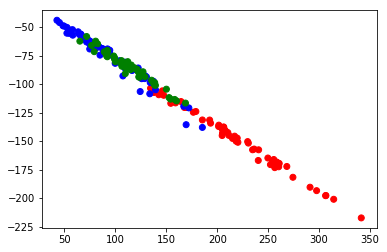

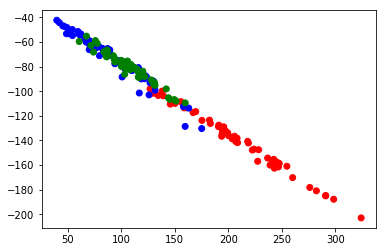

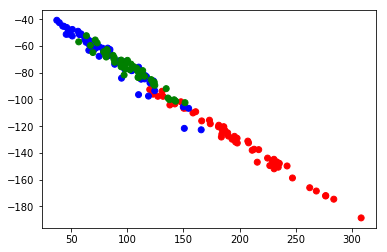

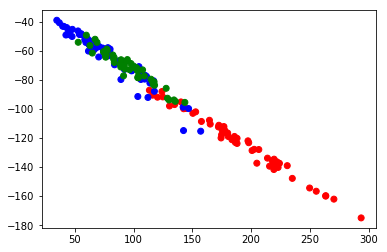

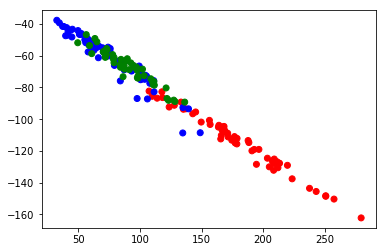

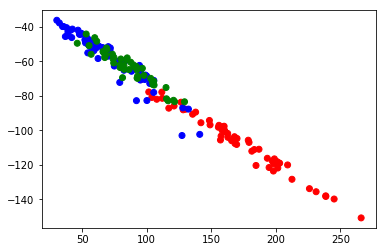

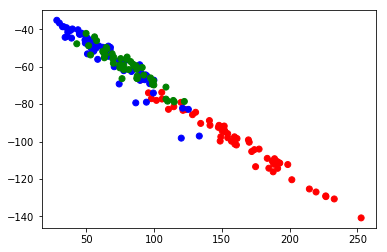

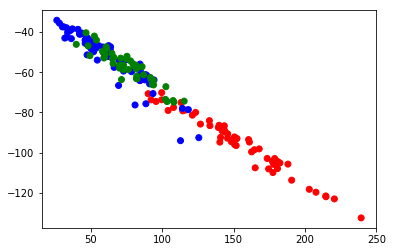

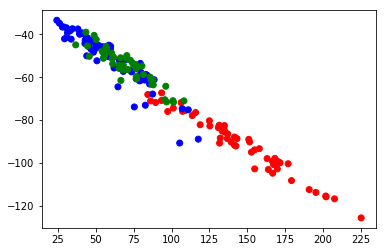

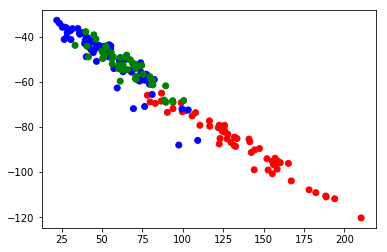

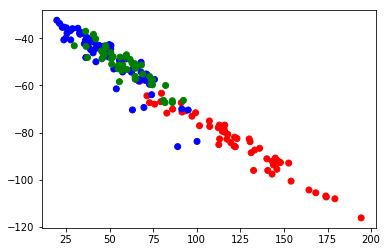

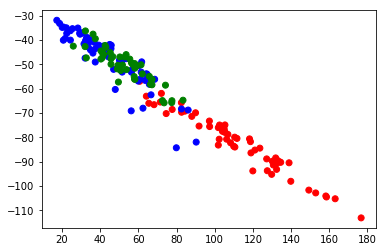

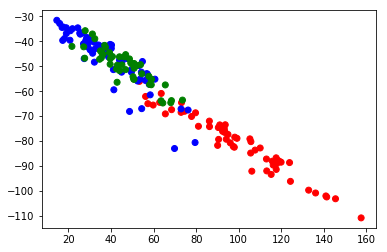

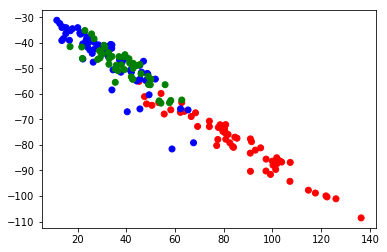

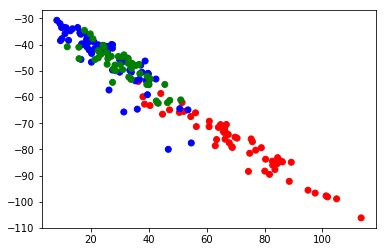

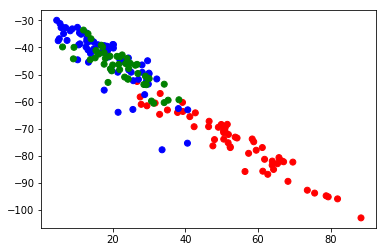

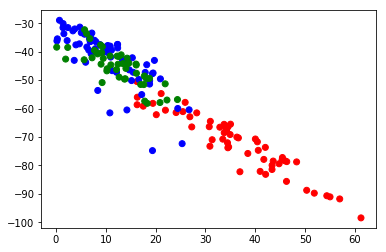

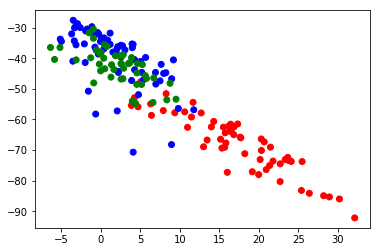

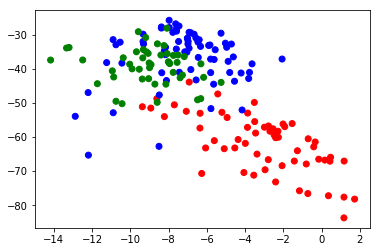

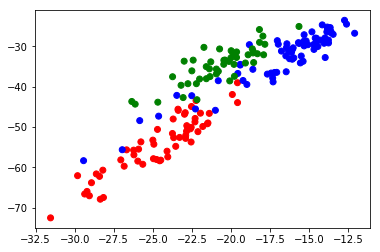

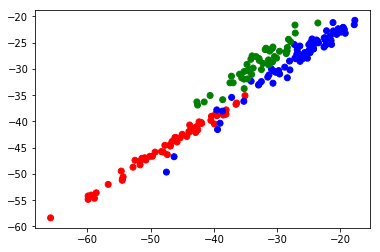

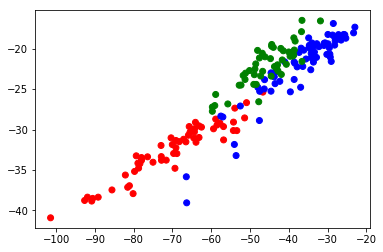

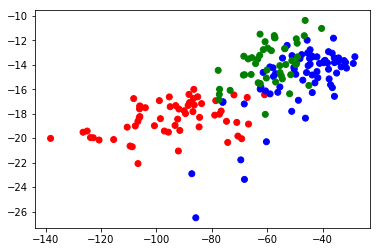

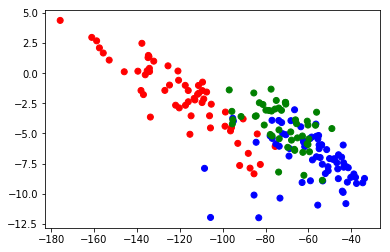

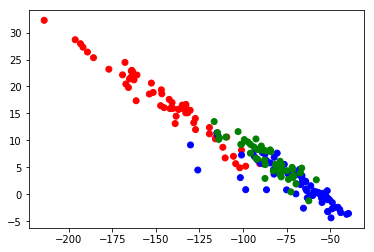

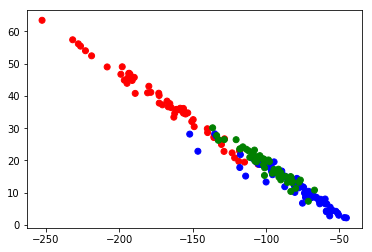

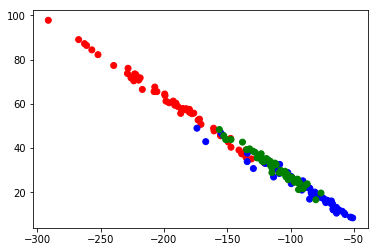

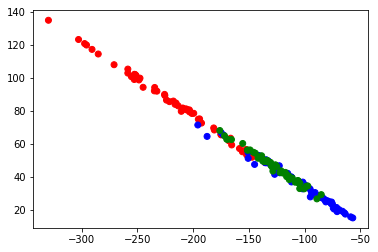

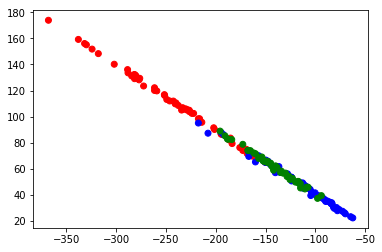

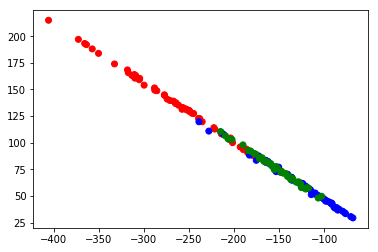

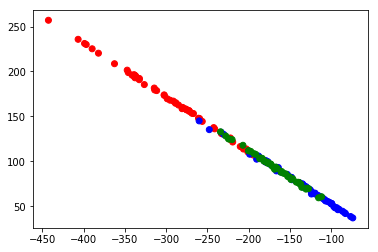

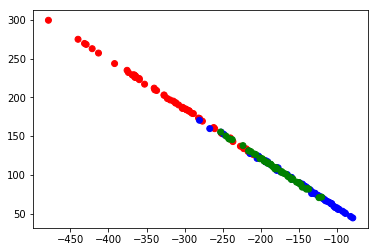

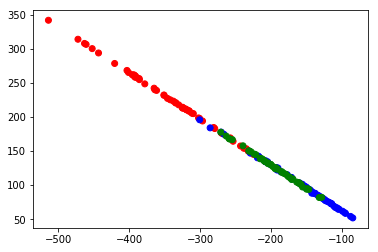

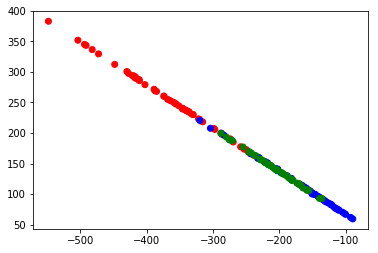

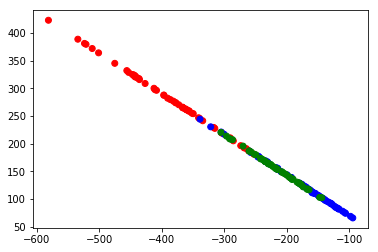

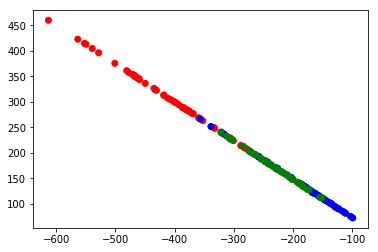

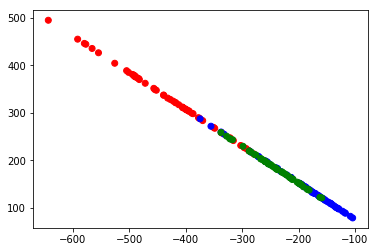

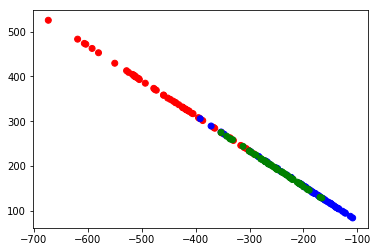

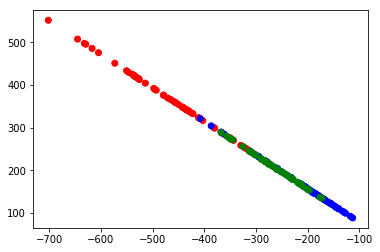

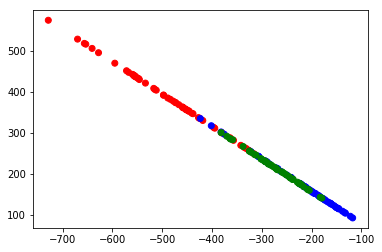

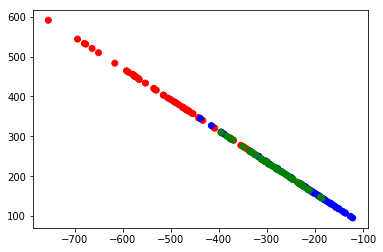

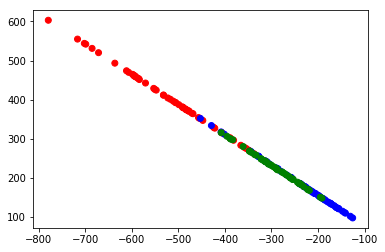

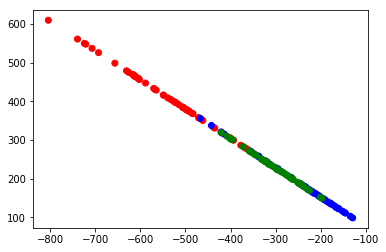

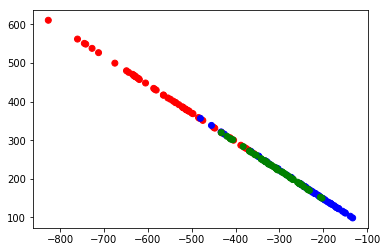

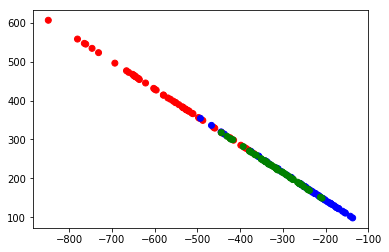

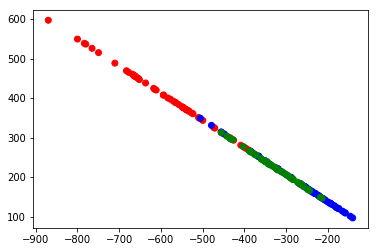

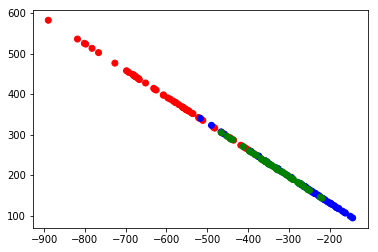

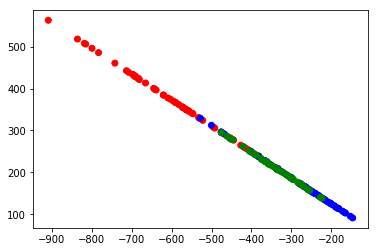

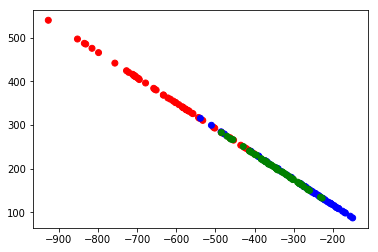

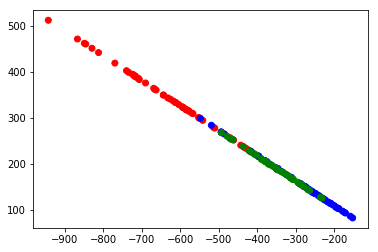

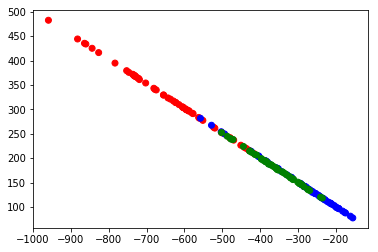

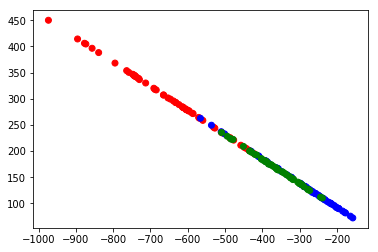

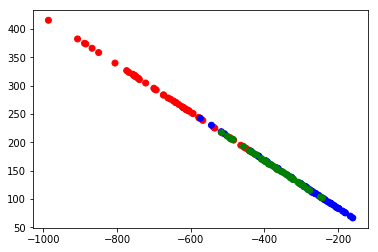

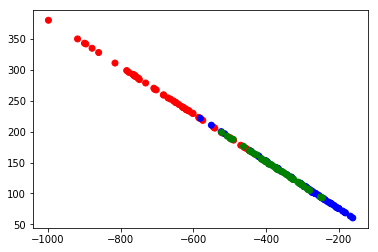

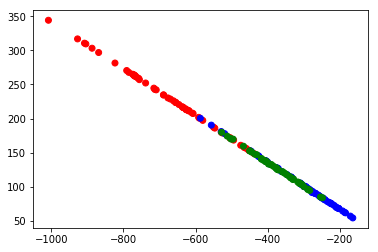

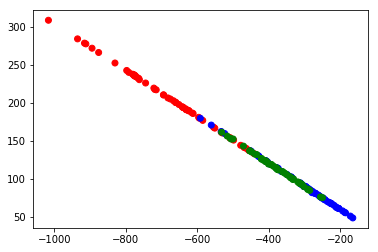

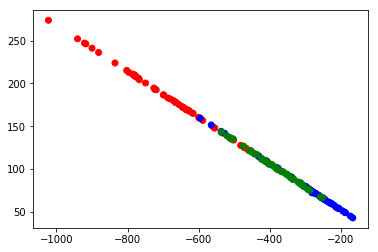

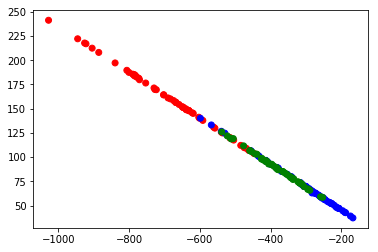

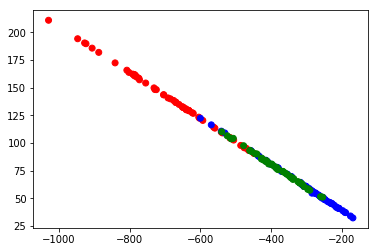

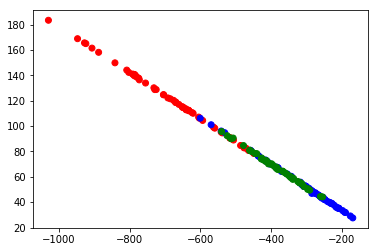

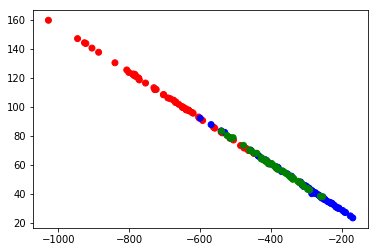

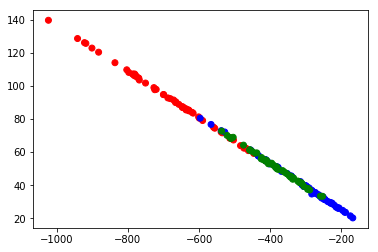

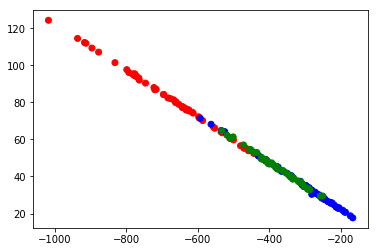

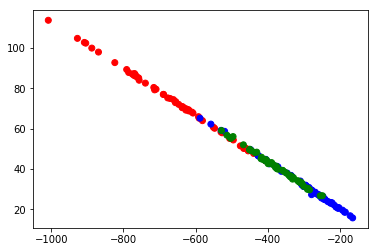

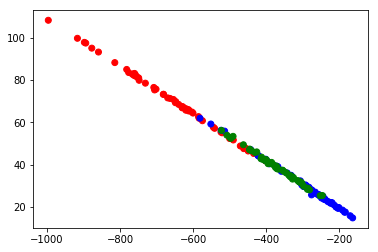

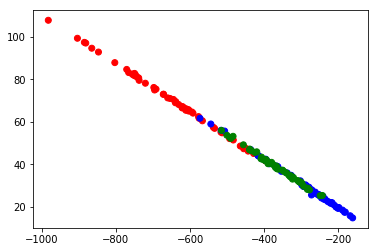

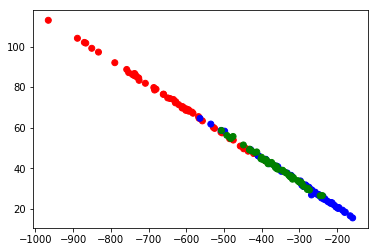

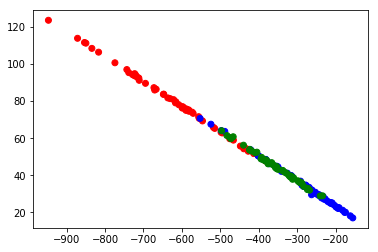

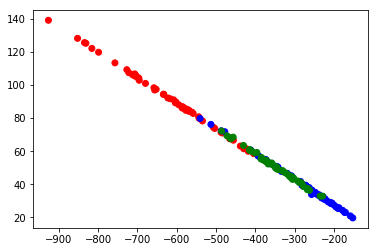

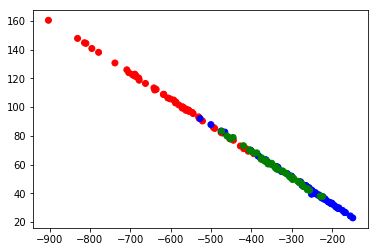

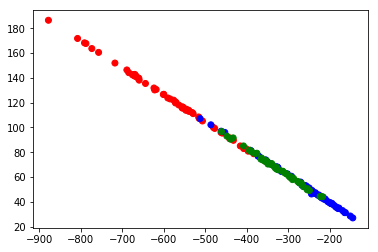

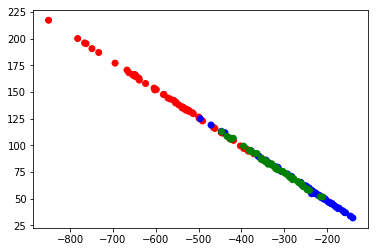

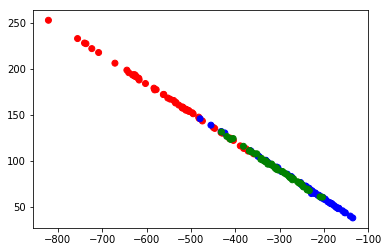

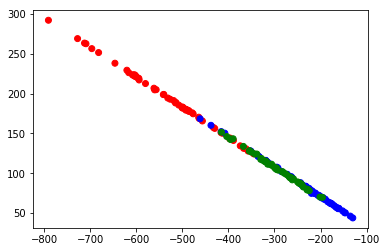

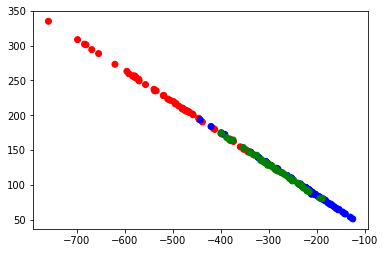

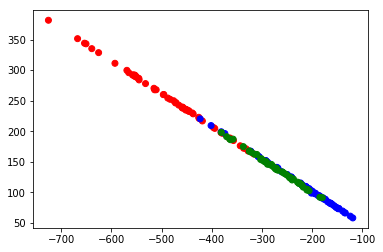

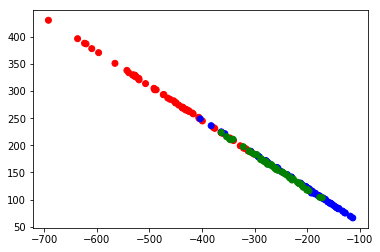

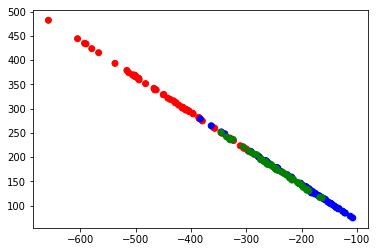

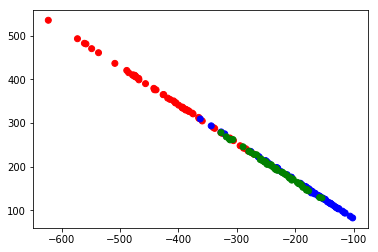

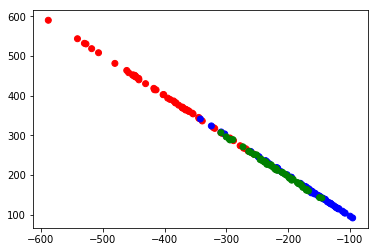

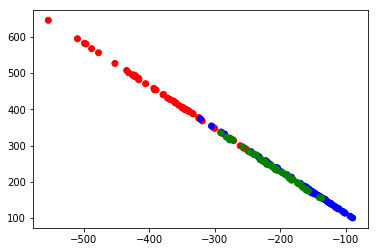

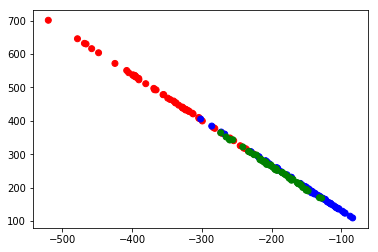

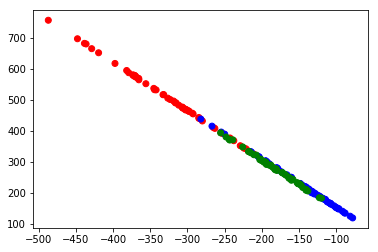

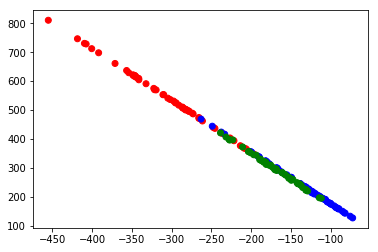

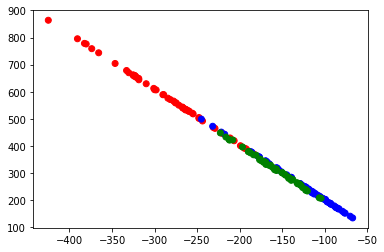

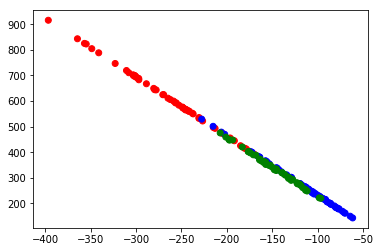

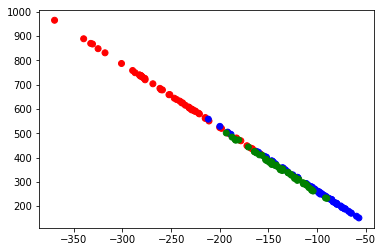

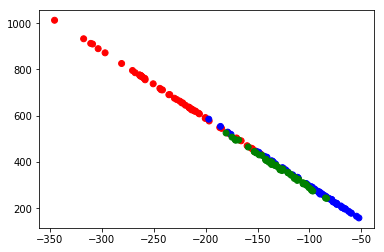

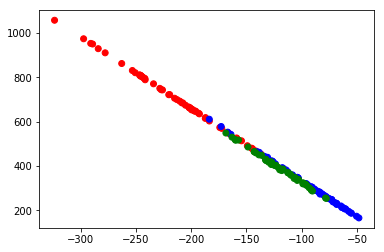

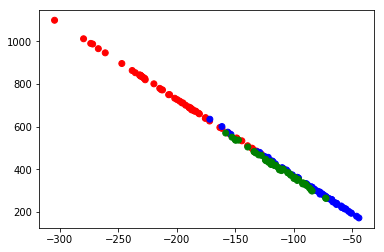

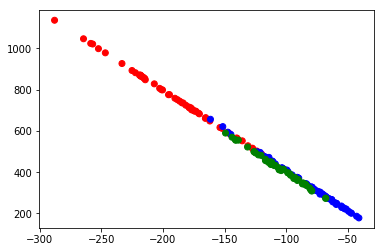

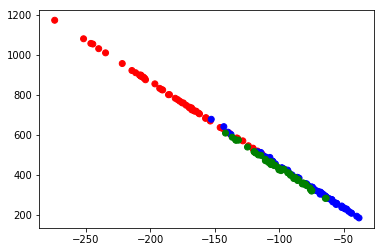

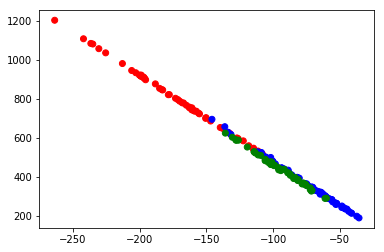

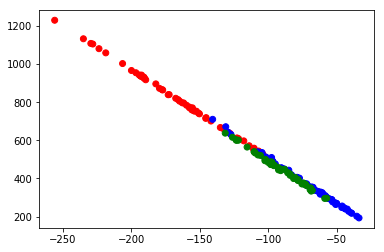

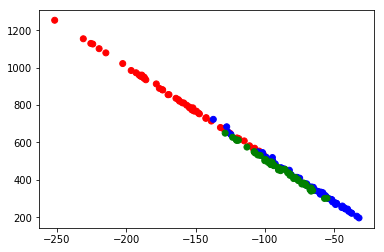

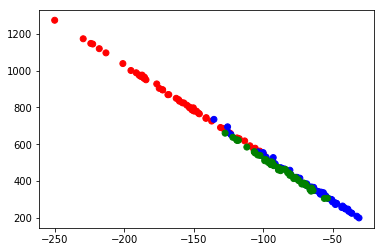

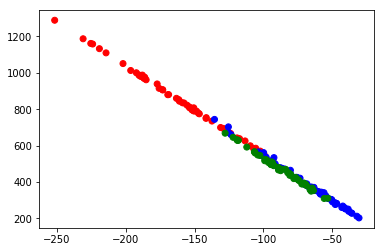

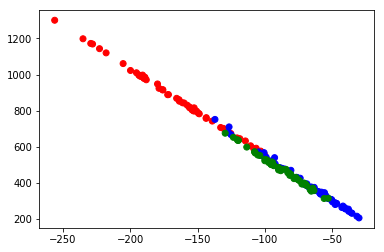

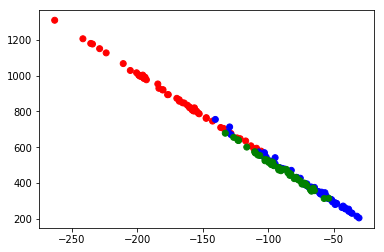

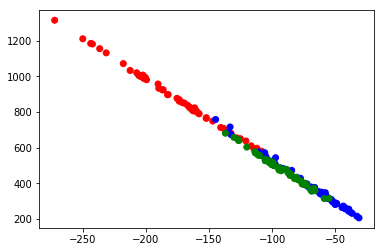

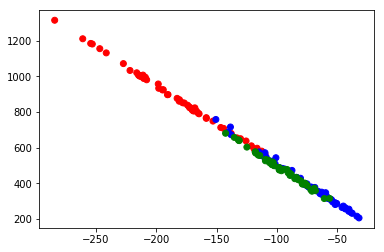

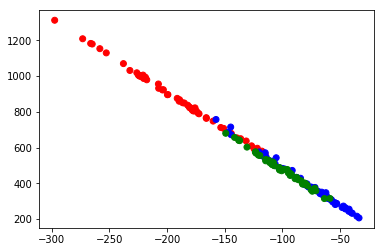

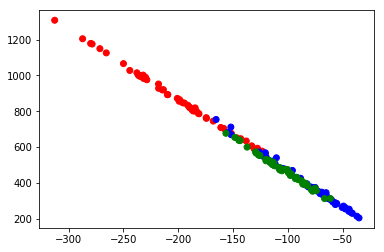

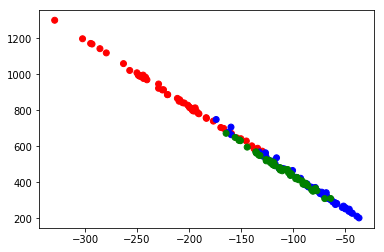

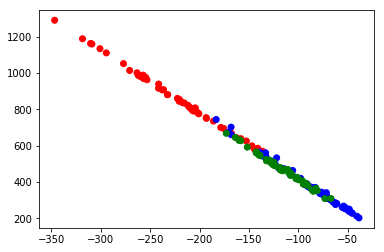

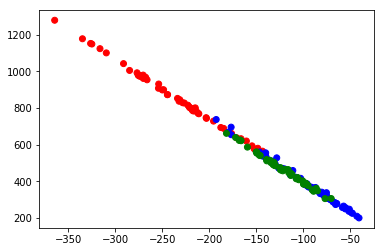

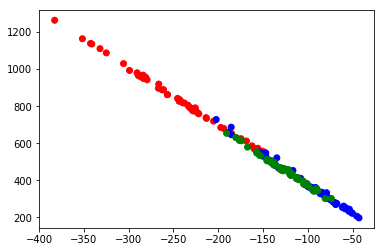

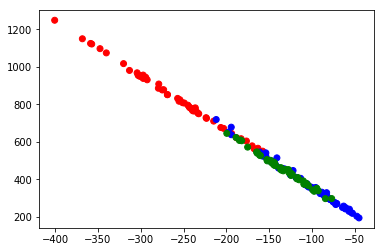

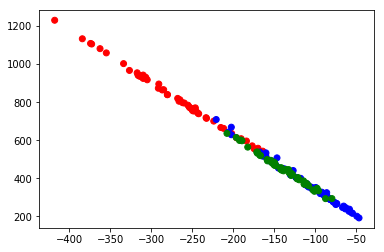

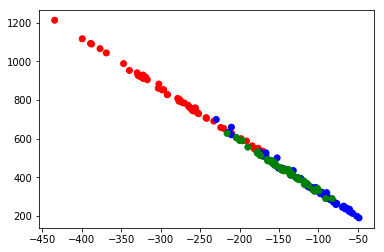

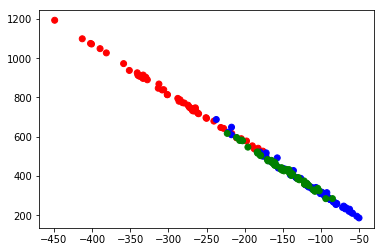

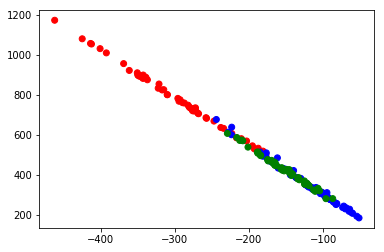

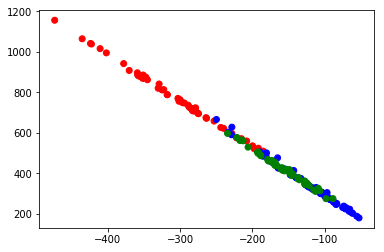

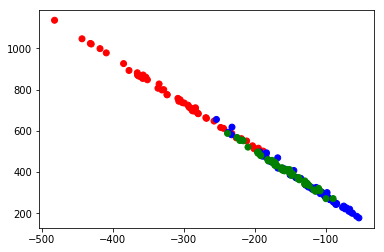

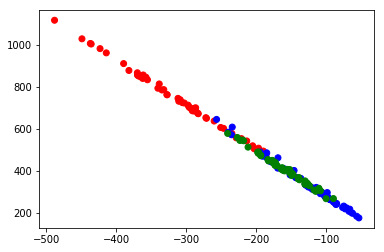

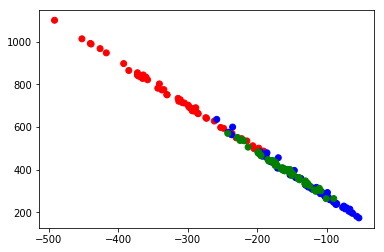

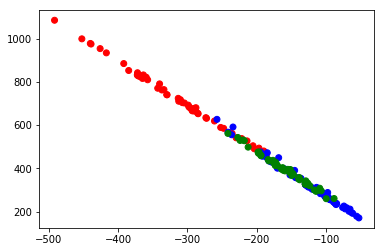

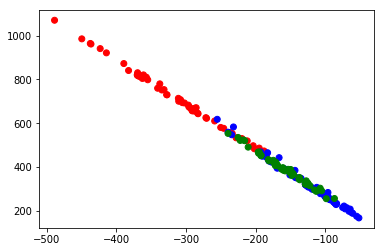

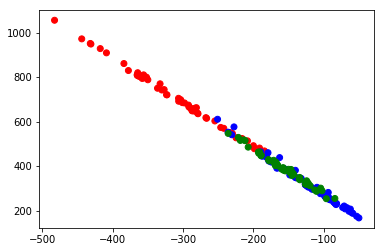

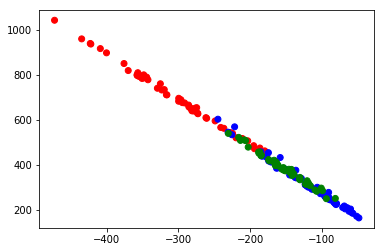

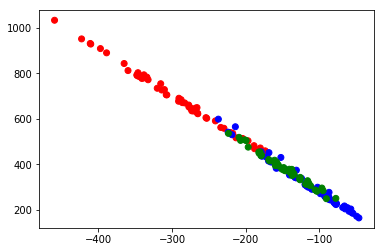

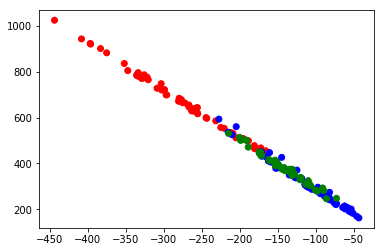

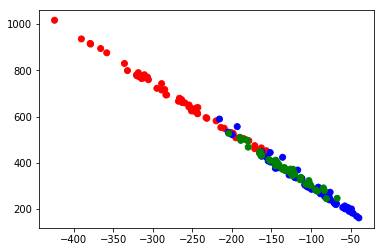

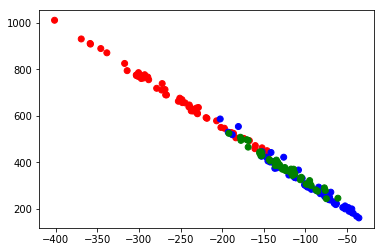

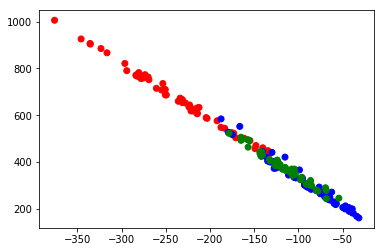

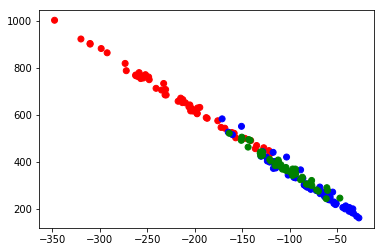

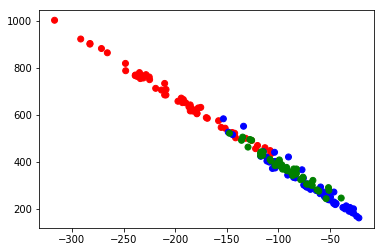

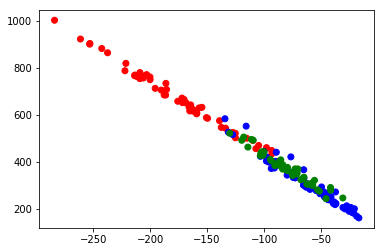

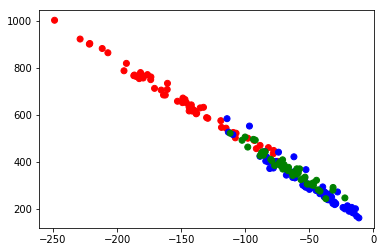

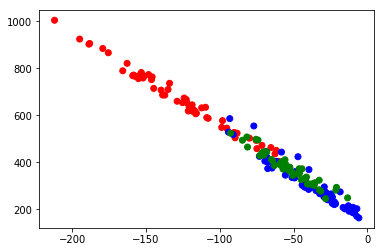

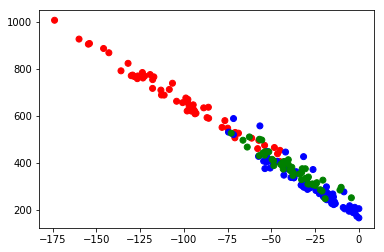

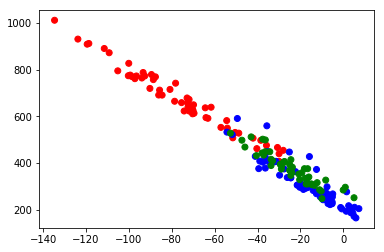

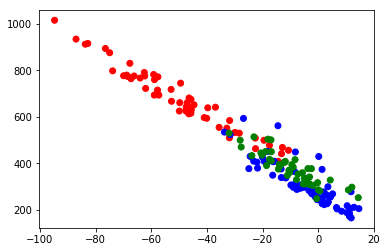

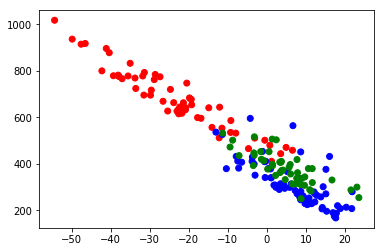

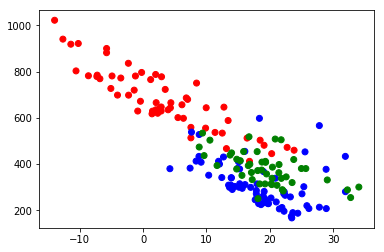

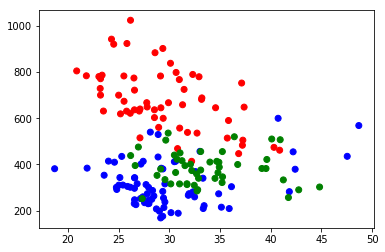

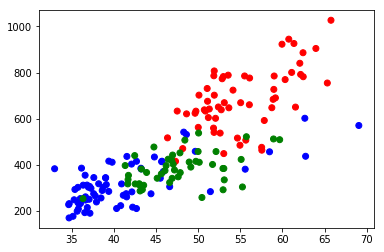

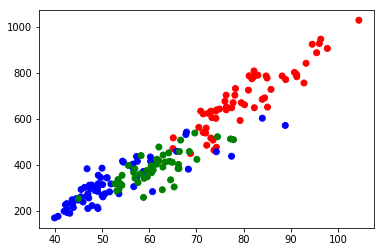

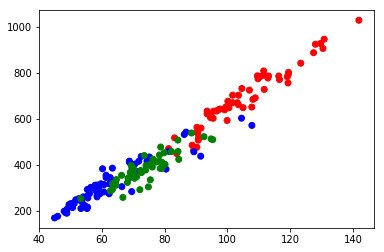

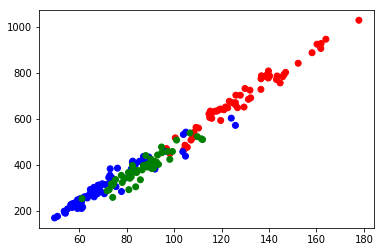

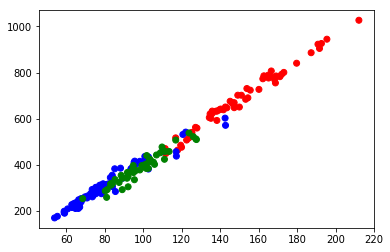

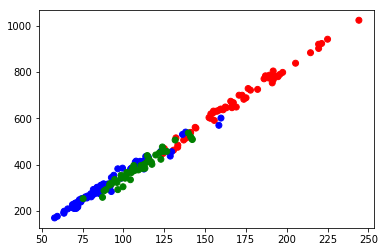

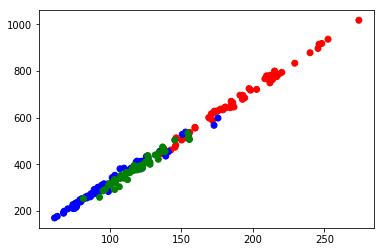

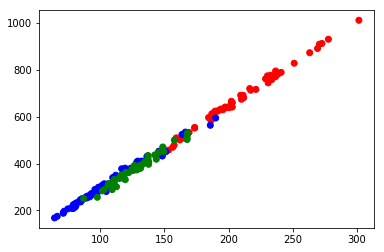

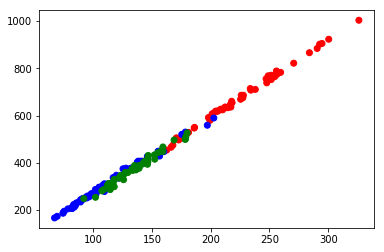

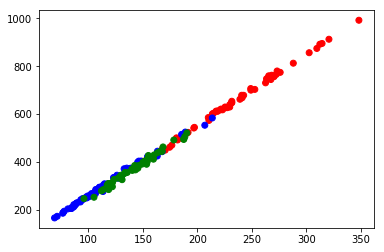

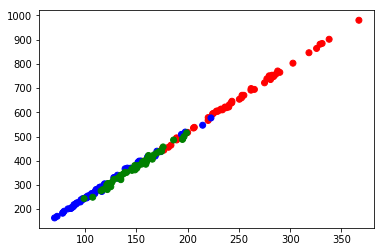

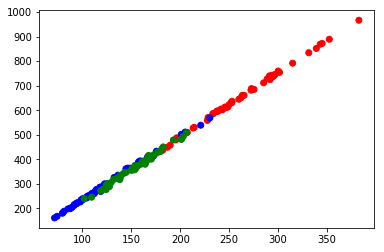

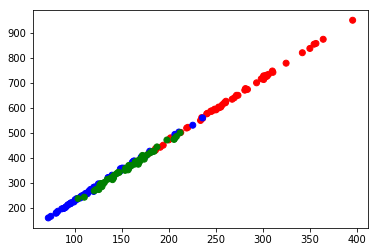

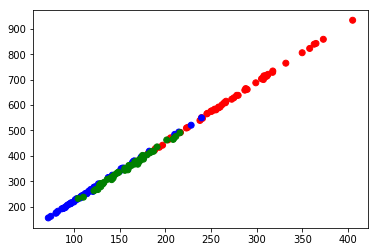

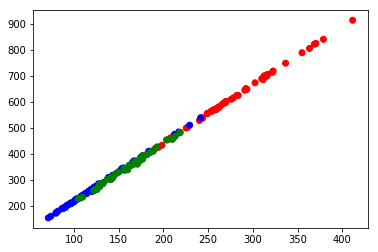

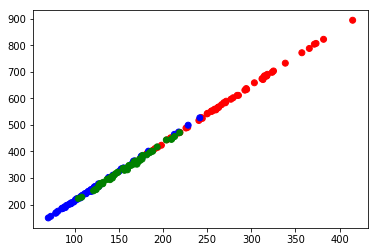

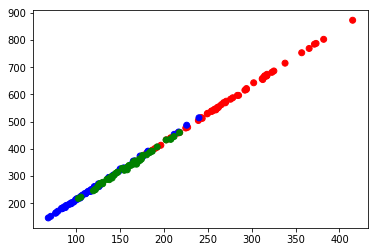

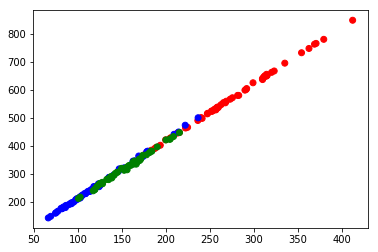

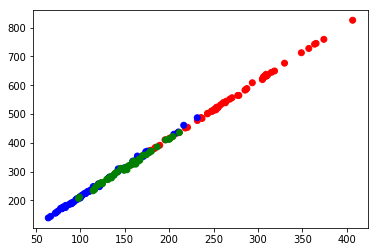

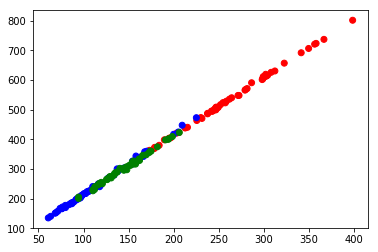

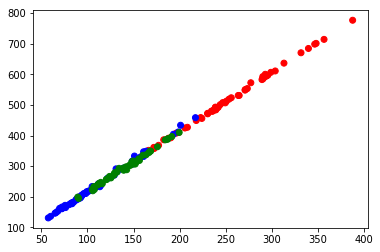

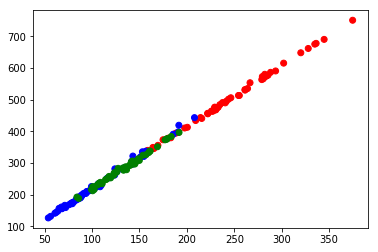

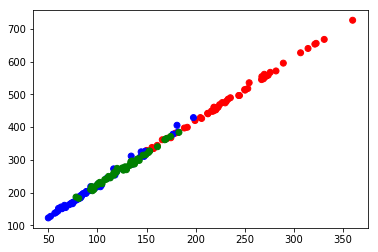

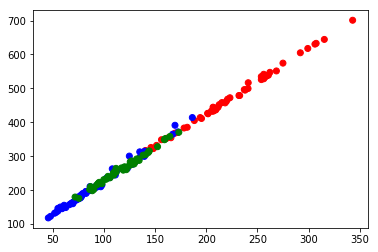

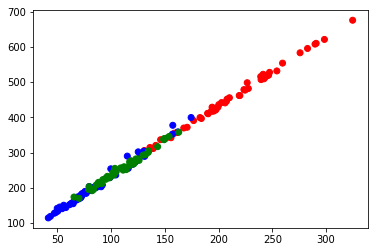

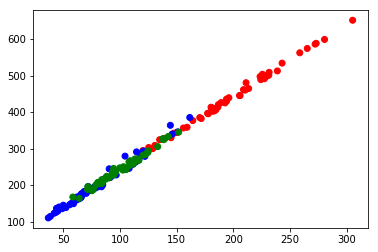

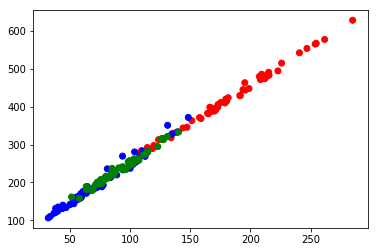

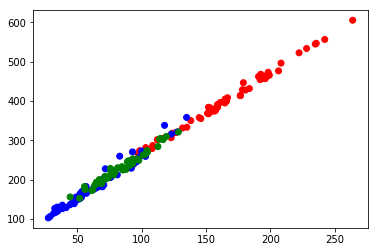

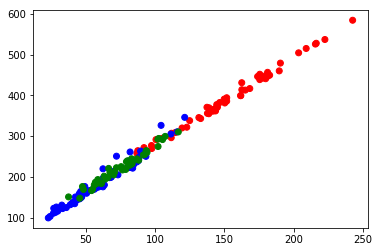

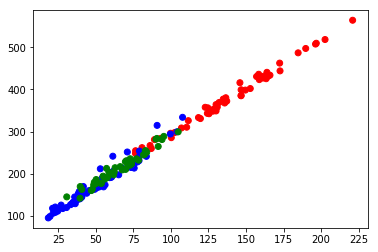

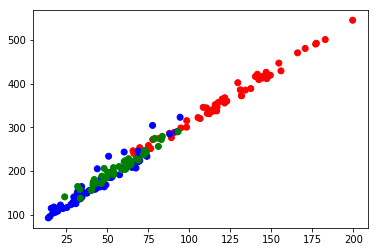

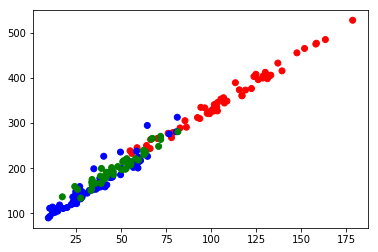

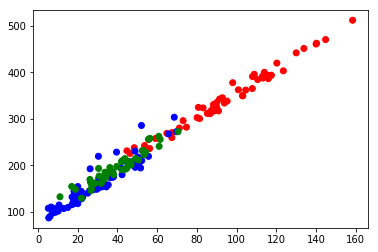

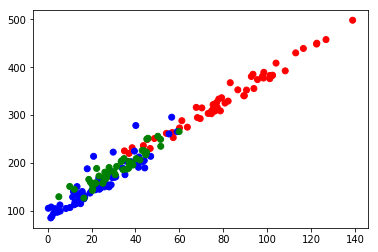

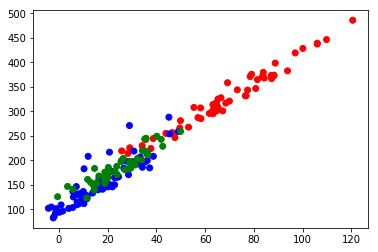

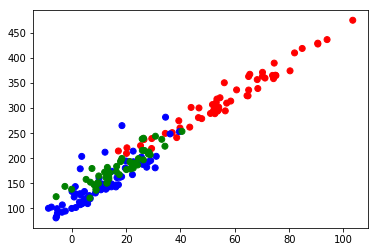

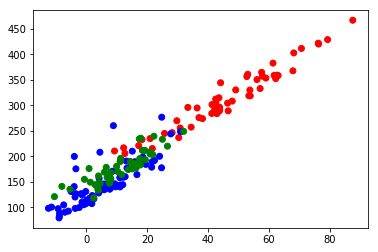

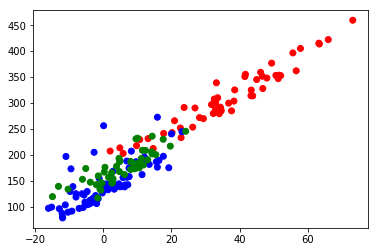

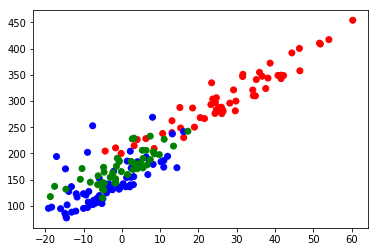

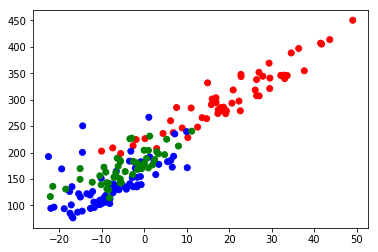

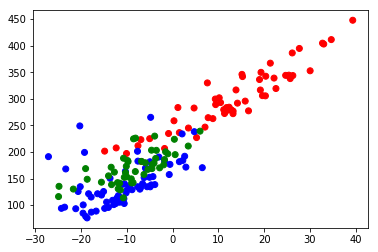

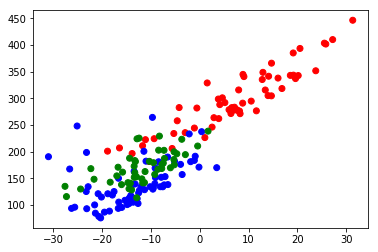

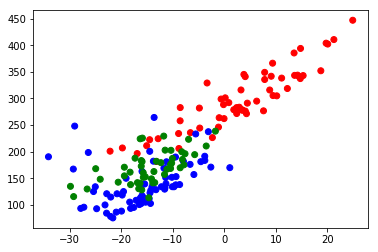

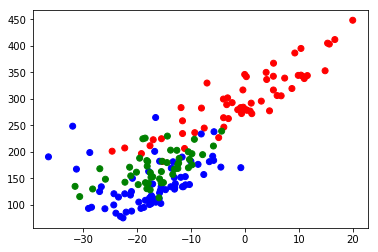

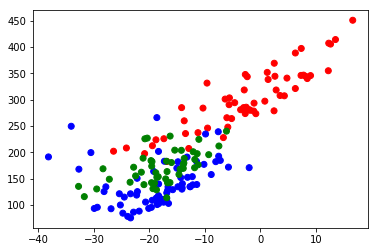

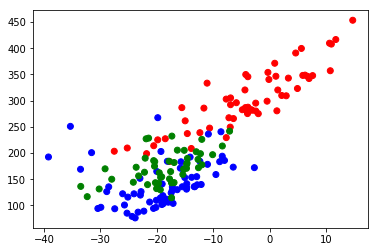

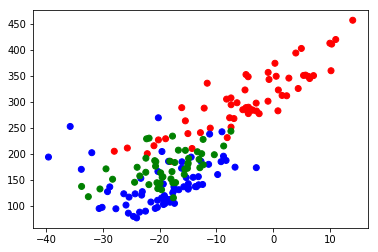

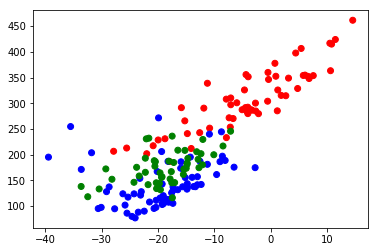

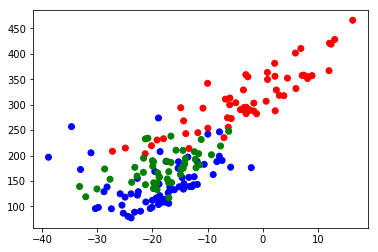

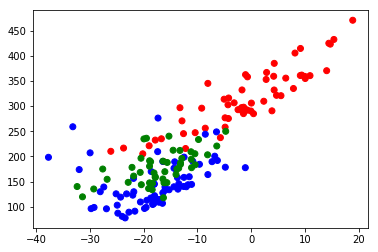

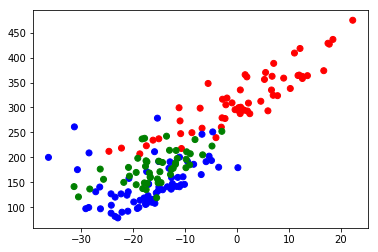

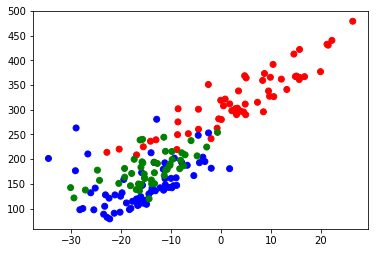

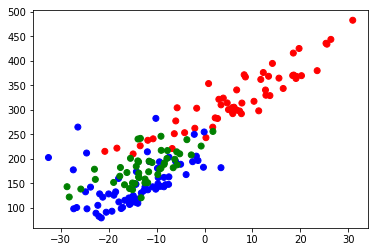

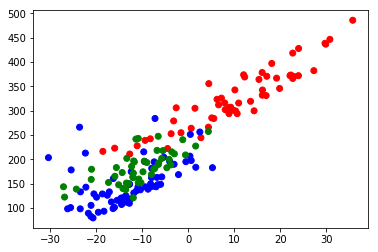

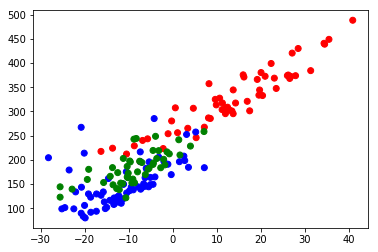

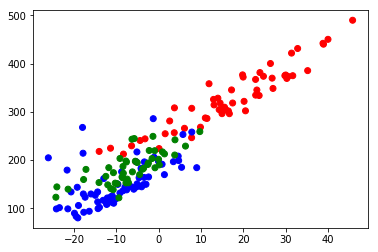

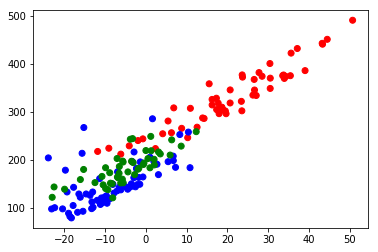

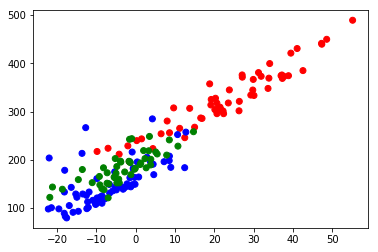

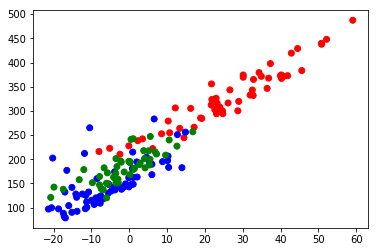

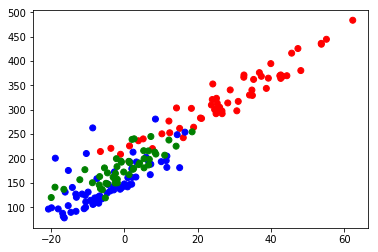

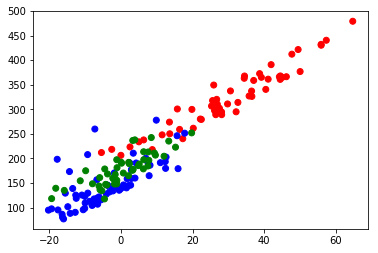

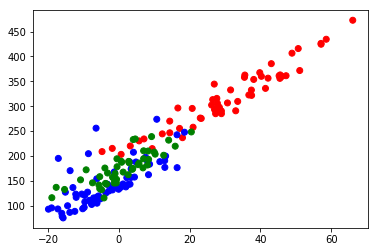

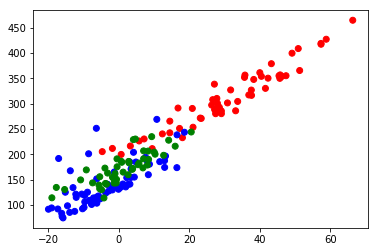

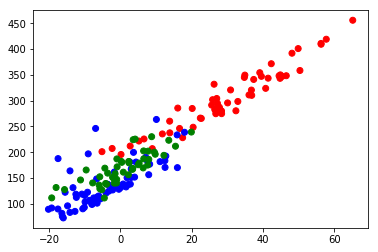

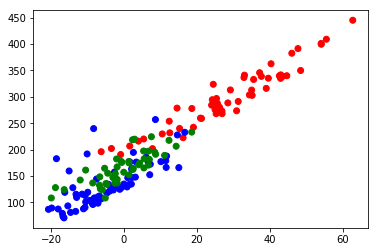

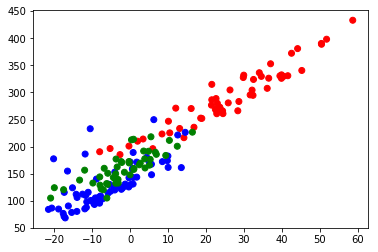

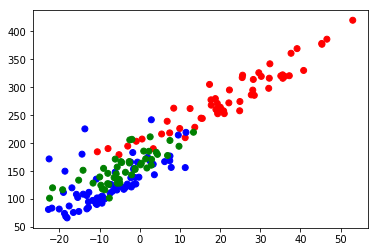

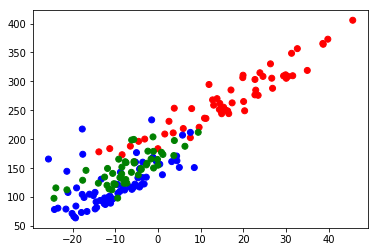

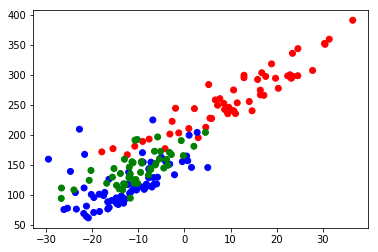

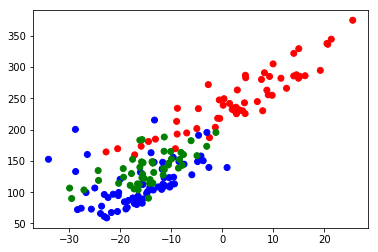

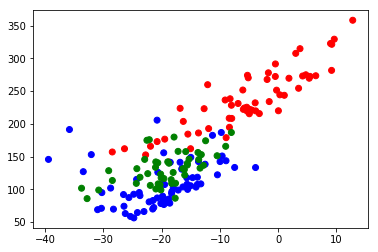

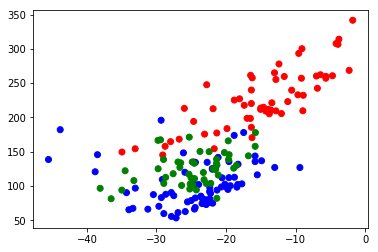

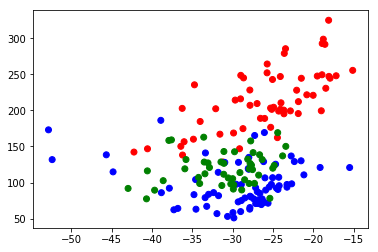

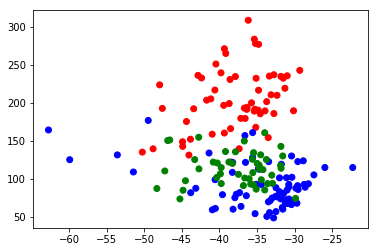

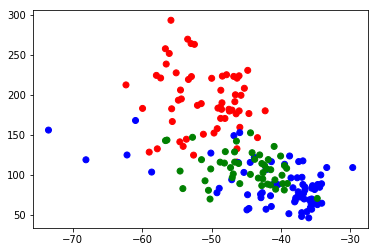

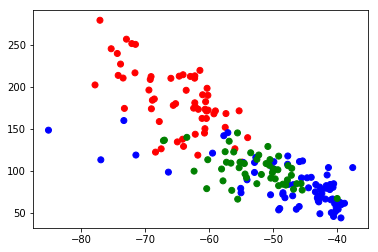

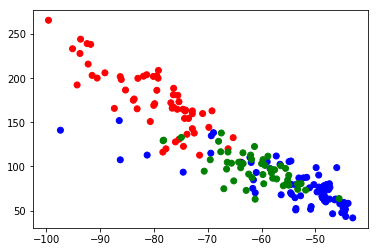

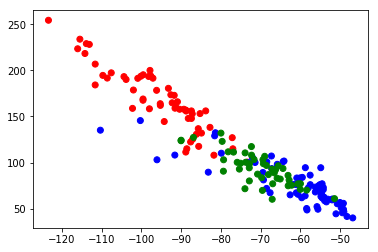

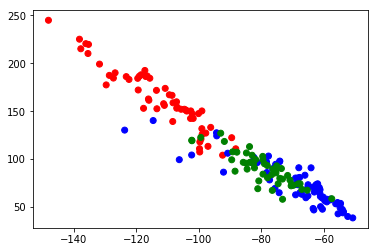

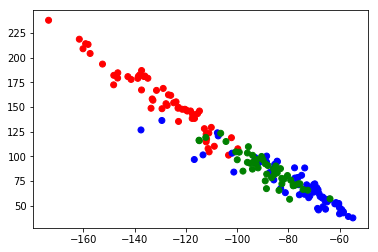

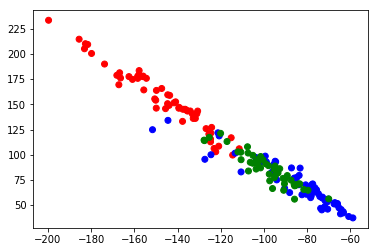

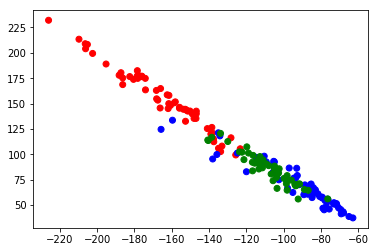

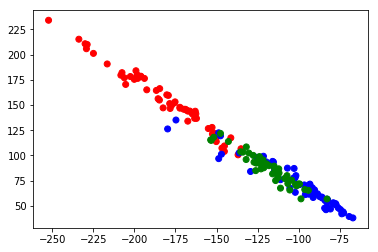

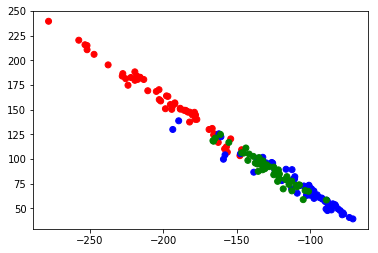

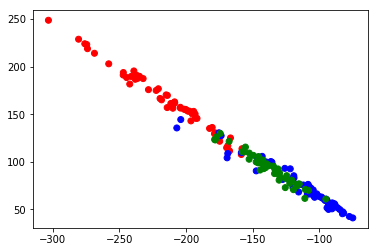

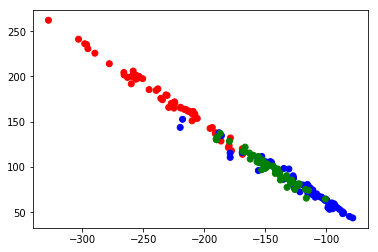

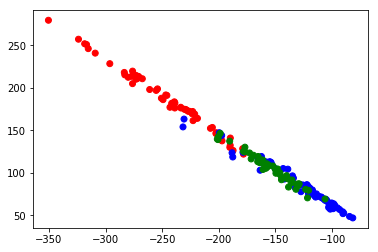

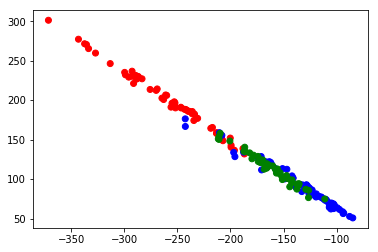

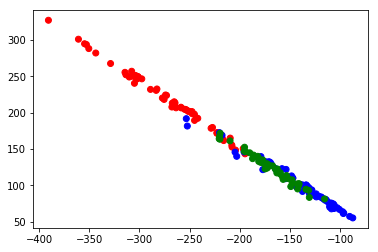

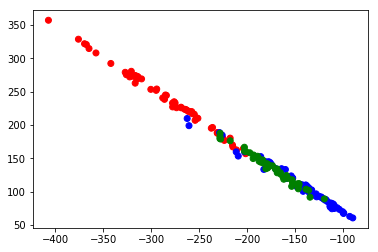

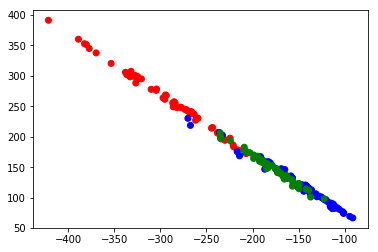

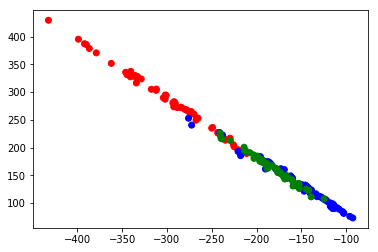

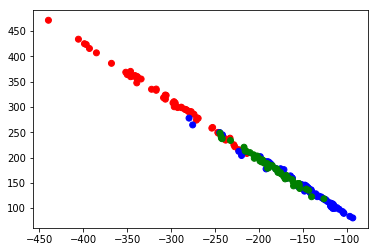

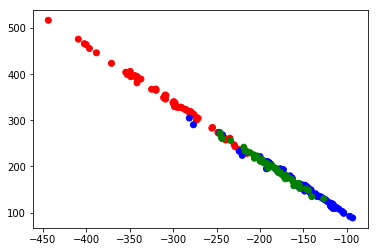

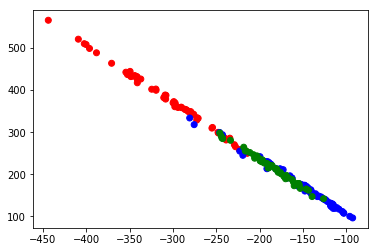

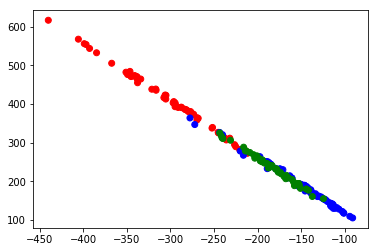

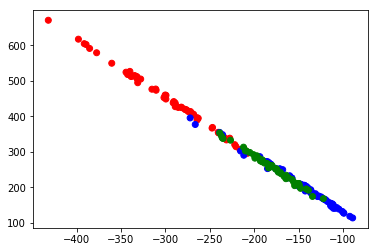

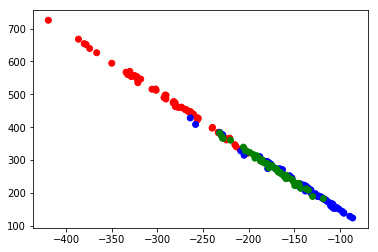

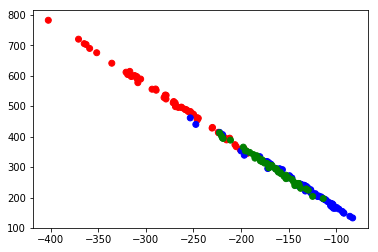

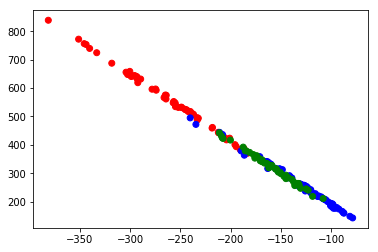

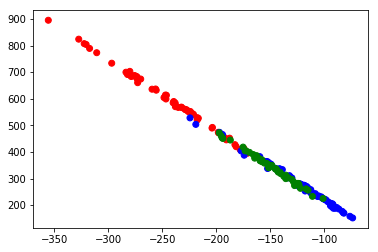

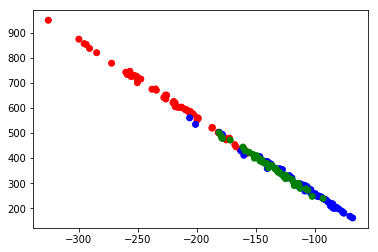

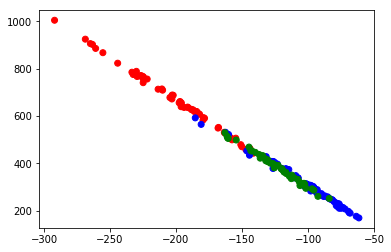

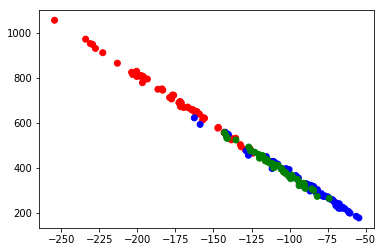

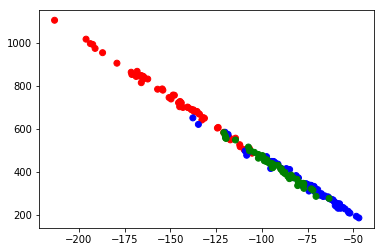

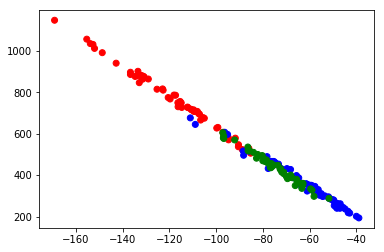

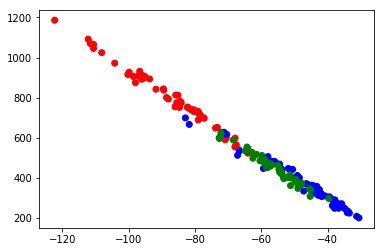

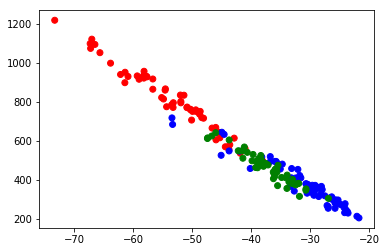

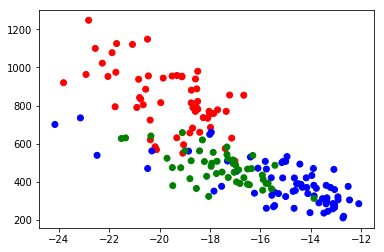

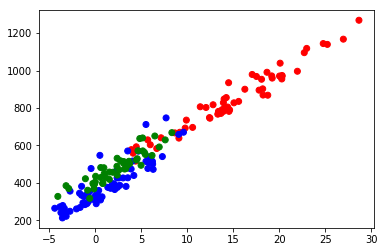

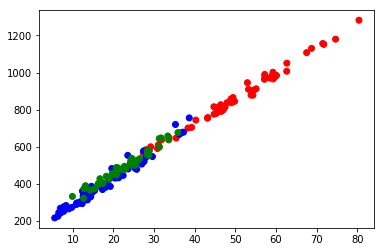

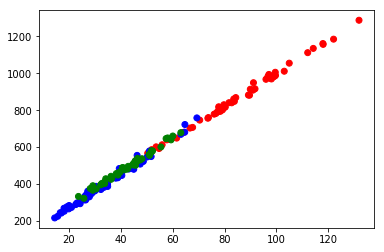

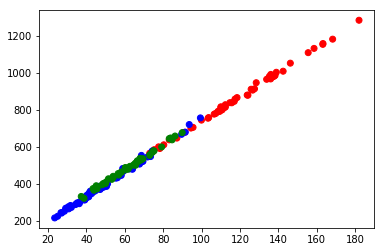

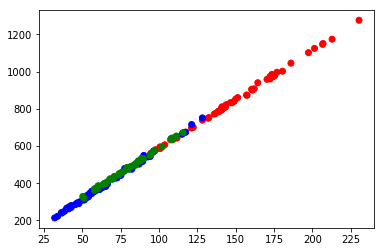

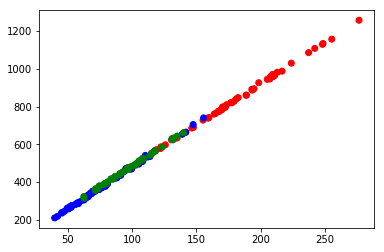

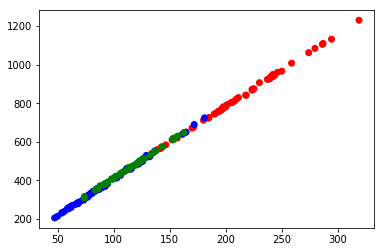

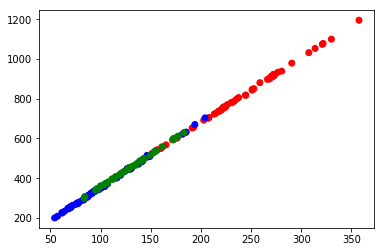

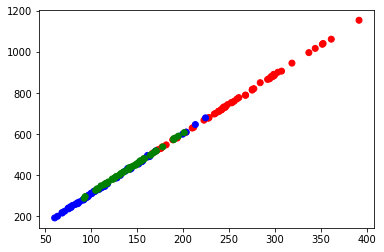

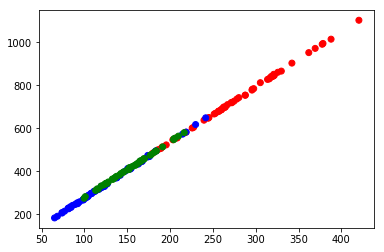

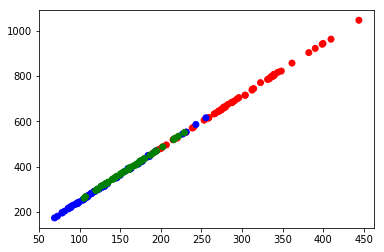

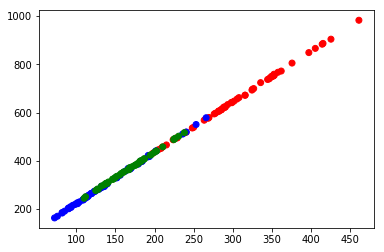

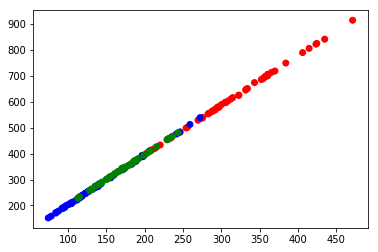

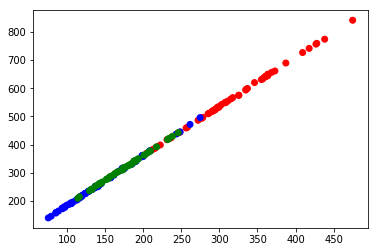

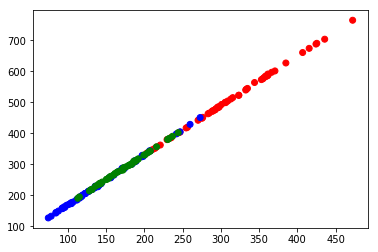

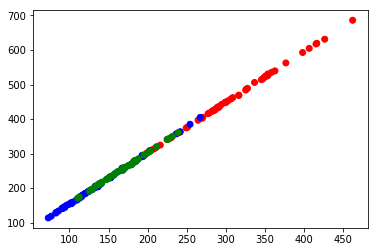

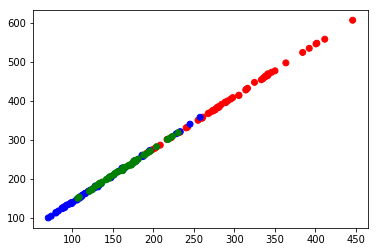

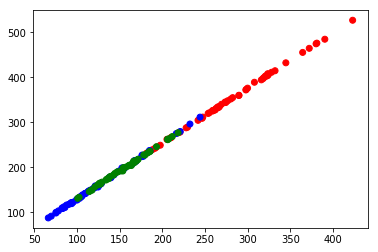

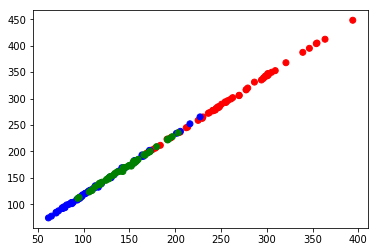

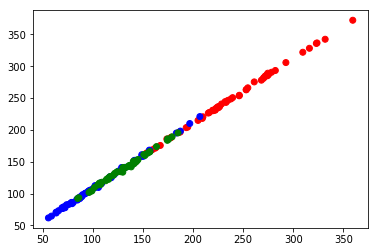

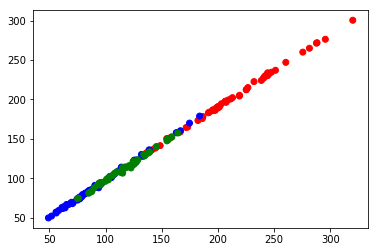

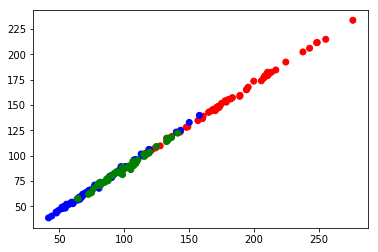

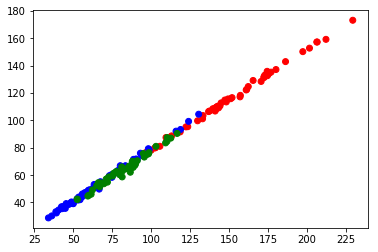

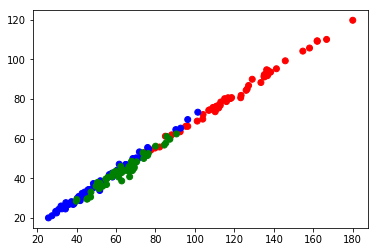

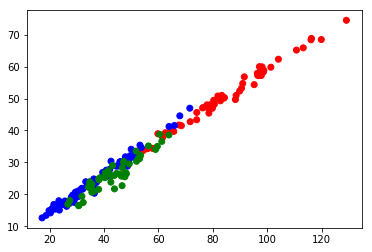

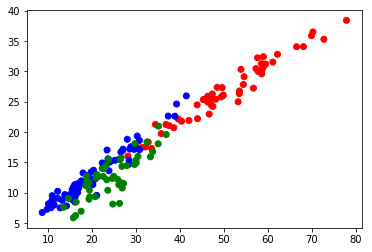

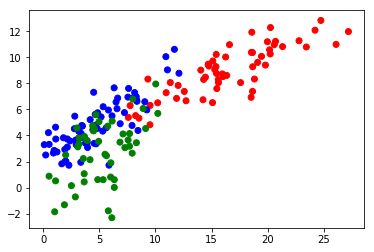

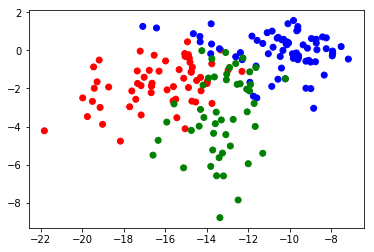

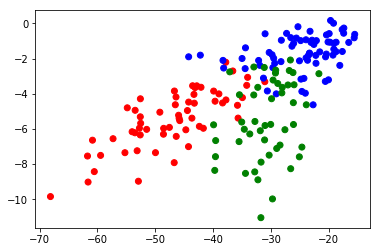

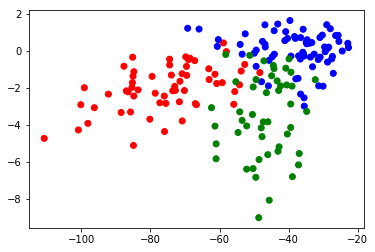

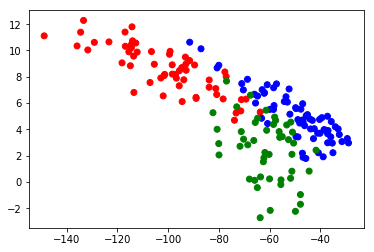

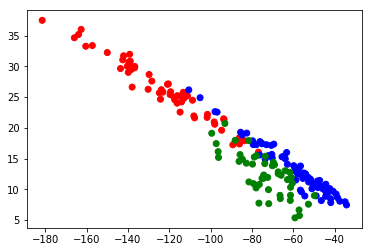

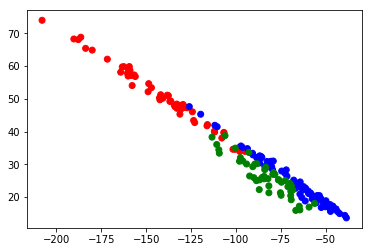

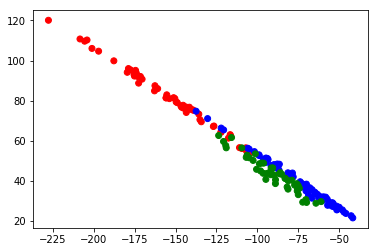

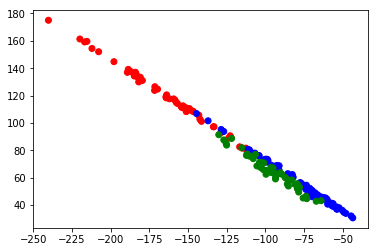

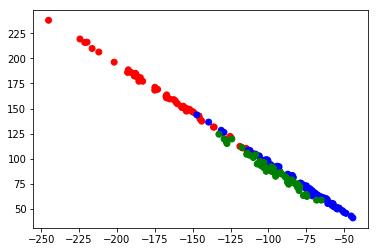

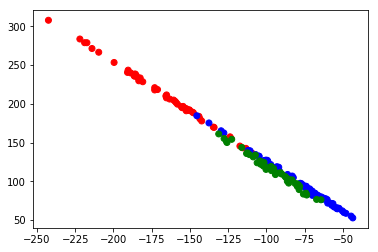

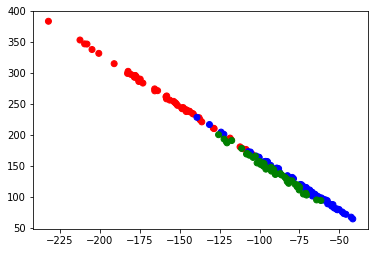

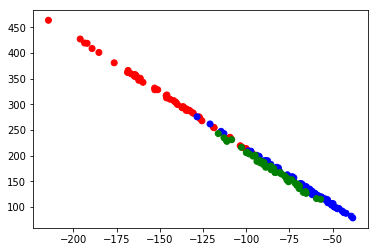

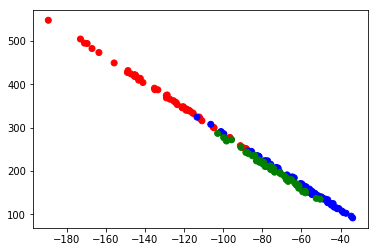

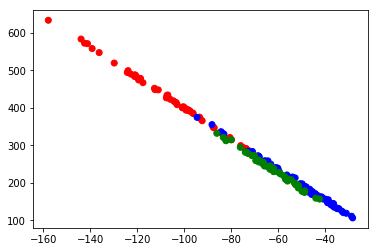

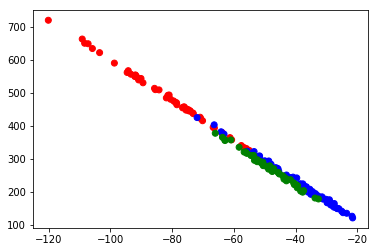

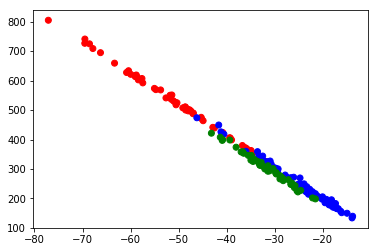

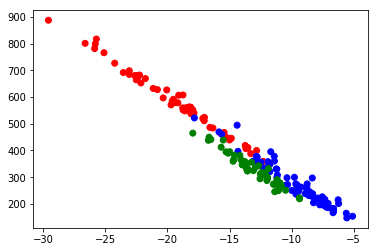

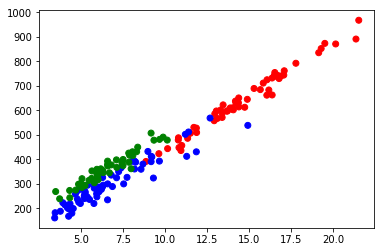

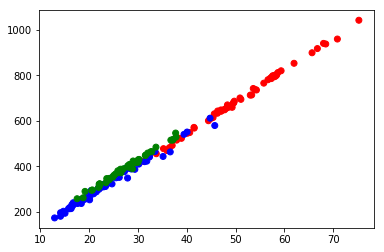

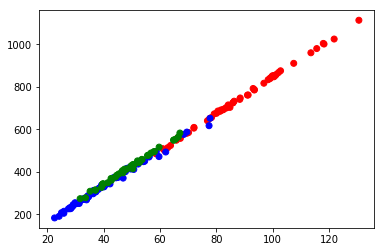

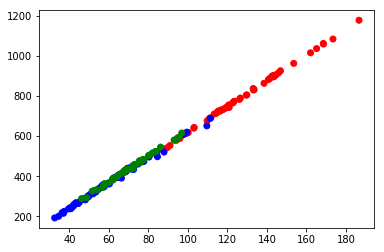

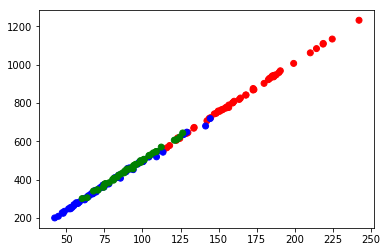

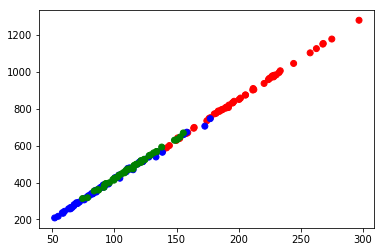

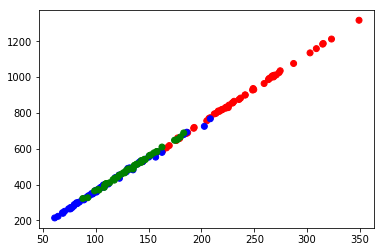

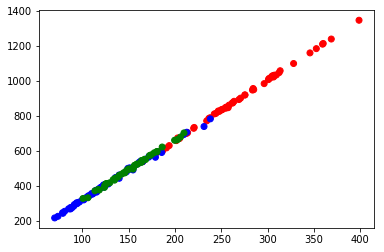

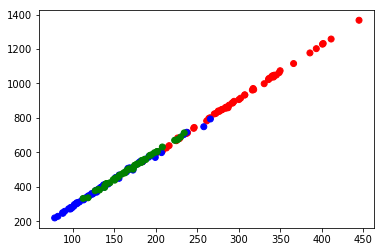

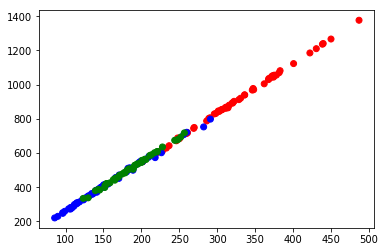

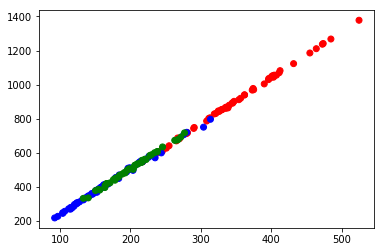

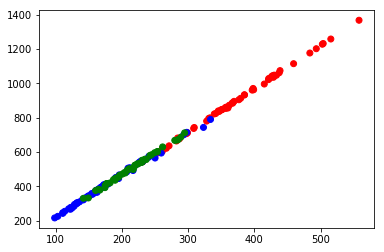

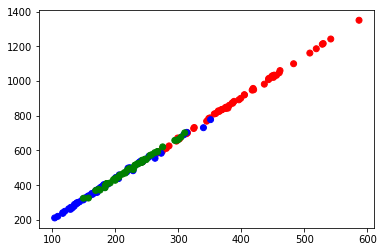

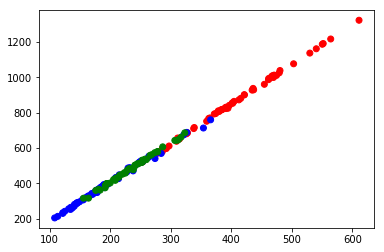

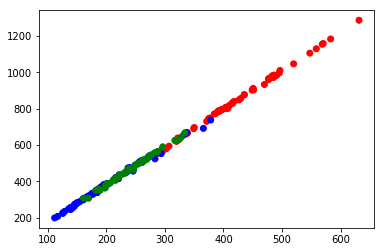

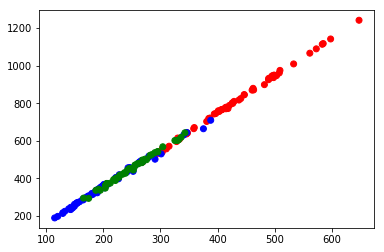

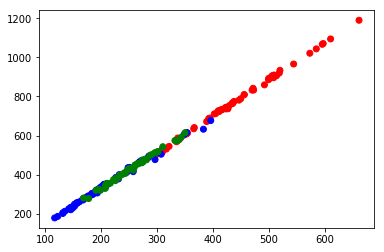

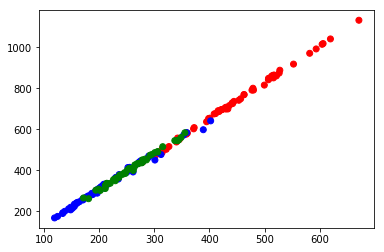

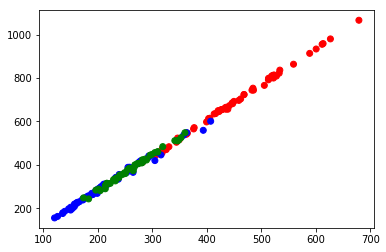

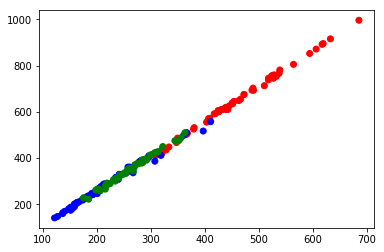

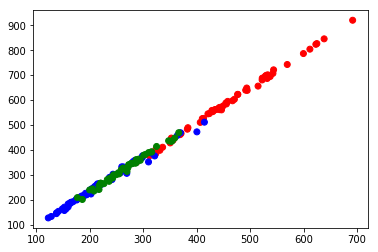

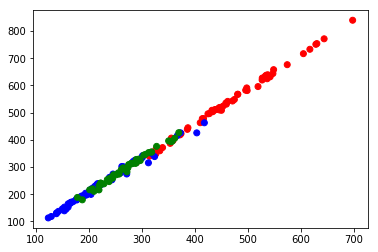

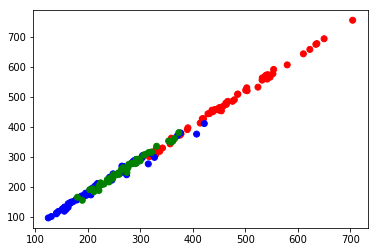

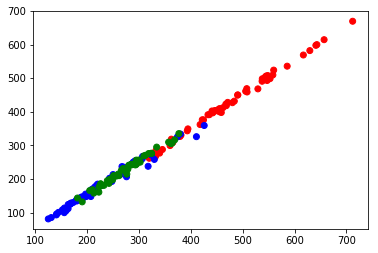

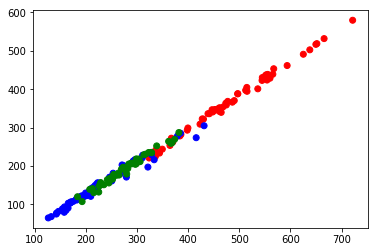

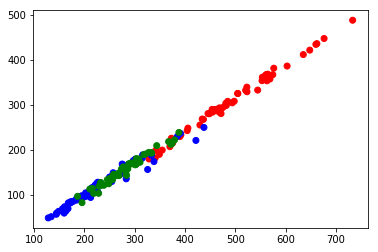

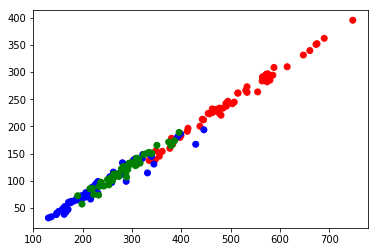

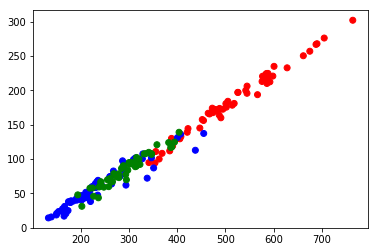

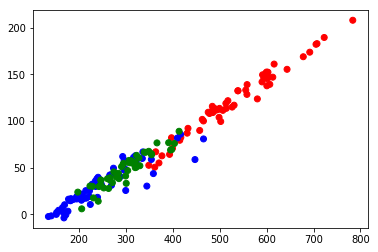

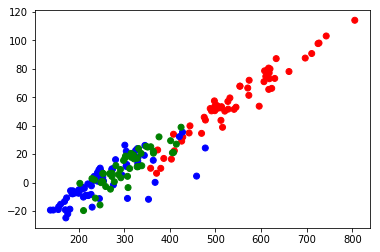

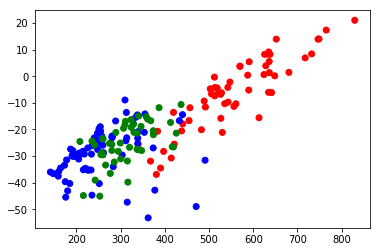

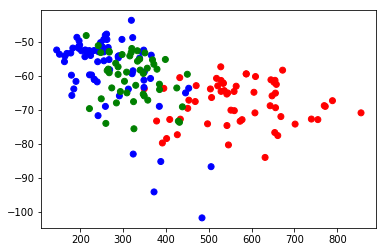

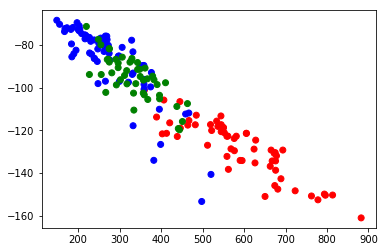

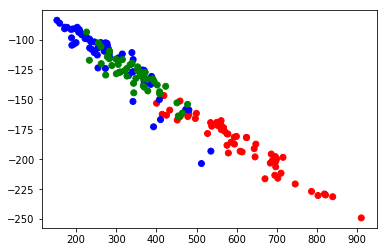

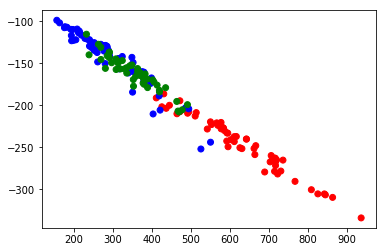

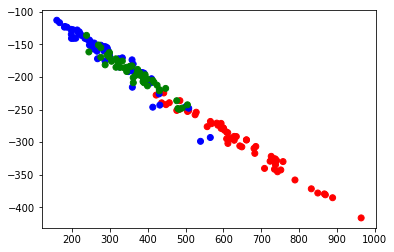

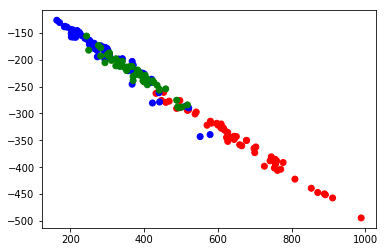

In [136]:
for i in range(0, 1000):
    if i % 2 == 0:
        xData = tData[i][0]
        yData = tData[i][1]

        plt.scatter(xData, yData, color = data_colour)
        plt.show()

        
#slider_depth.on_changed(update_depth)
plt.show()


(array([1., 2., 3., 4., 5., 1., 2., 1.]),
 array([1., 2., 3., 4., 5., 2., 2., 1.]))

In [87]:
testlist = [[1, 2, 3, 4], [1.1, 2.2 ,3.3, 4.4]]

In [88]:
testlist

[[1, 2, 3, 4], [1.1, 2.2, 3.3, 4.4]]

[[1, 2, 3, 4], [1.1, 2.2, 3.3, 4.4]]

<IPython.core.display.Javascript object>


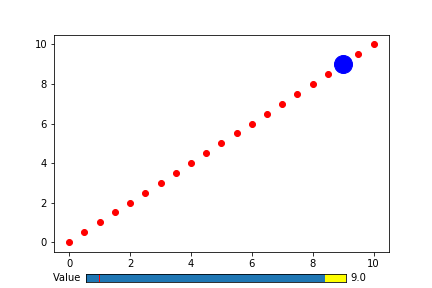

C:\Users\Dom\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [139]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider

class ChangingPlot(object):
    def __init__(self):
        self.inc = 0.5

        self.fig, self.ax = plt.subplots()
        self.sliderax = self.fig.add_axes([0.2, 0.02, 0.6, 0.03],
                                          axisbg='yellow')

        self.slider = Slider(self.sliderax, 'Value', 0, 10, valinit=self.inc)
        self.slider.on_changed(self.update)
        self.slider.drawon = False

        x = np.arange(0, 10.5, self.inc)
        self.ax.plot(x, x, 'ro')
        self.dot, = self.ax.plot(self.inc, self.inc, 'bo', markersize=18)

    def update(self, value):
        value = int(value / self.inc) * self.inc
        self.dot.set_data([[value],[value]])
        self.slider.valtext.set_text('{}'.format(value))
        self.fig.canvas.draw()

    def show(self):
        plt.show()

p = ChangingPlot()
p.show()


In [155]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt


%matplotlib inline

import numpy as np

fig = plt.figure()
def plot_func(timestep):
    fig.clear()
    xData = tData[int(timestep)][2]
    yData = tData[int(timestep)][4]
    plt.scatter(xData, yData, color = data_colour)
    plt.show()

interact(plot_func, timestep = widgets.FloatSlider(value=1,
                                               min=0,
                                               max=1000,
                                               step=1))




interactive(children=(FloatSlider(value=1.0, description='timestep', max=1000.0, step=1.0), Output()), _dom_cl…

<function __main__.plot_func>

In [146]:
tData[282]

array([[-484.49677148, -478.25168664, -540.05383932, ..., -379.73070502,
        -381.65905734, -255.13017591],
       [-211.29131592, -209.04920462, -234.21389469, ..., -162.33449978,
        -163.77636948, -107.11953265],
       [-665.56743084, -656.55373181, -741.40679052, ..., -520.8854612 ,
        -524.30698731, -348.67239532],
       ...,
       [ -21.29875363,  -17.23074261,  -21.44113606, ...,  -23.80827575,
         -22.3875607 ,  -23.35149948],
       [  14.63585094,   13.26529874,   13.51717544, ...,   13.79773245,
          13.82554175,   14.79036654],
       [  -4.90664025,   -2.7055183 ,   -4.79420164, ...,   -5.63502197,
          -6.0750711 ,   -5.85394724]])